In [ ]:
# default_exp s_plots

In [ ]:
#hide_input
import pivotpy as pp 
pp.nav_links(2)

<style>a{text-decoration: none !important;color:lightkblue;font-weight:bold;}
                a:focus,a:active,a:hover{color:hotpink !important;}</style>
> [&nbsp;`▶` Index&nbsp;](https://massgh.github.io/pivotpy/)  
> [&nbsp;`▶` XmlElementTree&nbsp;](https://massgh.github.io/pivotpy/XmlElementTree)  
> [&nbsp;`▶` StaticPlots●&nbsp;](https://massgh.github.io/pivotpy/StaticPlots)  
> [&nbsp;`▶` InteractivePlots&nbsp;](https://massgh.github.io/pivotpy/InteractivePlots)  
> [&nbsp;`▶` Utilities&nbsp;](https://massgh.github.io/pivotpy/Utilities)  
> [&nbsp;`▶` StructureIO&nbsp;](https://massgh.github.io/pivotpy/StructureIO)  
> [&nbsp;`▶` Widgets&nbsp;](https://massgh.github.io/pivotpy/Widgets)  


# Static Plots
> All types of plots in matplotlib are included in this module. This includes bands,DOS and other general plots, which can be saved as pdf,png,jpg and other formats that matplotlib offers.

## Passing Large Number of Arguments as a Dictionary
- Let's take example of `plot_bands`. It requires 10 arguments and most of them are default, but in order to tweak parameters, you still need to access them. Follow These steps to input arguments easily.
- In code cell, write `plot_bands?` and hit enter. This will give Signature and DocString.
- Copy arguments and pass to a dictionary `dict(what you copied)`. In a Jupyter Notebook cell, you can edit it:

In [ ]:
arg_dict=dict(
    ax=None,
    kpath=None,
    bands=None,
    showlegend=True,
    E_Fermi=0,
    color1=(1, 0, 0.8),
    style1='solid',
    lw1=0.7,
    )
arg_dict

{'ax': None,
 'kpath': None,
 'bands': None,
 'showlegend': True,
 'E_Fermi': 0,
 'color1': (1, 0, 0.8),
 'style1': 'solid',
 'lw1': 0.7}

- As you can see, I deleted few unnecessary arguments. Now you can use dictionary unpacking operator `**` inside function, it will pass all arguments present in dictionary. Make sure you do not change name of variables, although you can delete as few of them.
- **Usage:** Call function as `plot_bands(**arg_dict)`. You can edit dictionary on fly, or can save it to a file to read (Not recommended, could be a threat to your system security as reading dictionaries from a file could run potentially harmful commands as well.)

## Simple Band Struture Plots

In [ ]:
#export
def plot_bands(ax=None,kpath=None,bands=None,showlegend=False,E_Fermi=None,\
                color1=(0,0,0.8),style1='solid',lw1=0.7,color2=(0.8,0,0),style2='dashed',lw2=0.7):
    """
    - Returns axes object and plot on which all matplotlib allowed actions could be performed.
    - **Parameters**
        - ax         : Matplotlib axes object, if not given, one is created.
        - kpath      : 1D array from `get_kpts`().kpath or `export_vasprun`().kpath.
        - bands      : Dictionary Object from `get_evals` or `export_vasprun`().bands.
        - showlegend : Boolean, default is False, if true, gives legend for spin-polarized calculations.
        - E_Fermi    : If not given, automatically picked from bands object.
        - **kwargs   : lines color,width and style to distinguish spin Up and Down.
    - **Returns**
        - ax : matplotlib axes object with plotted bands.
    """
    import pivotpy.g_utils as gu
    # Fixing ax argument
    if(ax==None):
        import matplotlib.pyplot as plt
        fig,ax=plt.subplots(1,1,figsize=(3.4,2.6))
    else:
        ax==ax
    # Fixing kpath argument
    if(kpath==None):
        raise ValueError("kpath is not provided. Use get_kpath() or export_vasprun().kpath to generate it.")
    # Fixing bands arguement
    if(bands==None):
        raise ValueError("bands object is not provided. Use get_evals() or export_vasprun().bands to generate it.")
    if(E_Fermi==None):
       E_Fermi = bands.E_Fermi
    # Plotting
    if(bands.ISPIN==1):
        if(not bands.evals.all()):
            gu.printy("Can not plot an empty eigenvalues object.")
            return gu.printg("Try with large energy range.")
        en=bands.evals-E_Fermi
        ax.plot(kpath,en,color=color1,lw=lw1,ls=style1)
    if(bands.ISPIN==2):
        if(not bands.evals.SpinUp.all()):
            gu.printy("Can not plot an empty eigenvalues object.")
            return gu.printg("Try with large energy range.")
        enUp=bands.evals.SpinUp-E_Fermi
        enDown=bands.evals.SpinDown-E_Fermi
        ax.plot(kpath,enUp,color=color1,lw=lw1,ls=style1)
        ax.plot(kpath,enDown,color=color2,lw=lw2,ls=style2)
        # Legend only for spin polarized
        if(showlegend==True):
            ax.plot([],[],color=color1,lw=lw1,ls=style1,label='Spin Up')
            ax.plot([],[],color=color2,lw=lw2,ls=style2,label='Spin Down')
            ax.legend(fontsize='small',frameon=False,ncol=2, bbox_to_anchor=(0, 1), loc='lower left');
    return ax

In [ ]:
#export
def modify_axes(ax=None,xticks=[],xt_labels=[],xlim=[],\
            yticks=[],yt_labels=[],ylim=[],xlabel=None,ylabel=None,\
            vlines=True,zeroline=True):
    """
    - Returns None, applies given settings on axes. Prefered to use before other plotting.
    - **Parameters**
        - ax  : Matplotlib axes object.
        - (x,y)ticks : List of positions on (x,y axes).
        - (xt,yt)_labels : List of labels on (x,y) ticks points.
        - (x,y)lim : [min, max] of (x,y) axes.
        - (x,y)label : axes labels.
        - vlines : If true, drawn when `ylim` is not empty.
        - zeroline : If True, drawn when `xlim` is not empty.
    """
    if(ax==None):
        raise ValueError("Matplotlib axes (ax) is not given.")
    else:
        import matplotlib as mpl
        from matplotlib import rc
        mpl.rcParams['axes.linewidth'] = 0.4 #set the value globally
        mpl.rcParams['font.serif'] = "STIXGeneral"
        mpl.rcParams['font.family'] = "serif"
        mpl.rcParams['mathtext.fontset'] = "stix"
        if(xticks):
            ax.set_xticks(xticks)
            ax.set_xticklabels(xt_labels)
        if(yticks):
            ax.set_yticks(yticks)
            ax.set_yticklabels(yt_labels)
        if(xlim):
            ax.set_xlim(xlim)
            if(zeroline==True):
                ax.hlines(0,min(xlim),max(xlim),color=(0,0,0,0.6), linestyle='dashed',lw=0.3)
        if(ylim):
            ax.set_ylim(ylim)
            if(vlines==True):
                [ax.vlines(tick,min(ylim),max(ylim),color=(0,0,0,0.6), linestyle='dashed',lw=0.3) for tick in xticks]
        if(xlabel!=None):
            ax.set_xlabel(xlabel)
        if(ylabel!=None):
            ax.set_ylabel(ylabel)
        ax.tick_params(direction='in', top=True,bottom=True,left=True,right=True,length=4, width=0.3, grid_alpha=0.8)
    return None

In [ ]:
#hide
f1='E:/Research/graphene_example/ISPIN_1/bands/vasprun.xml'
f2='E:/Research/graphene_example/ISPIN_2/bands/vasprun.xml'
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors
from matplotlib import rc
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import collections  as mc
mpl.rcParams['axes.linewidth'] = 0.4 #set the value globally
mpl.rcParams['font.serif'] = "STIXGeneral"
mpl.rcParams['font.family'] = "serif"
mpl.rcParams['mathtext.fontset'] = "stix"

Working in object-oriented way, we can have plenty of options in matplotlib. See the example below, which provides an overview of flexibility of matplotlib. All functions are defined in object-oriented way for better compatibility and flexibility. 

## Example: Graphene

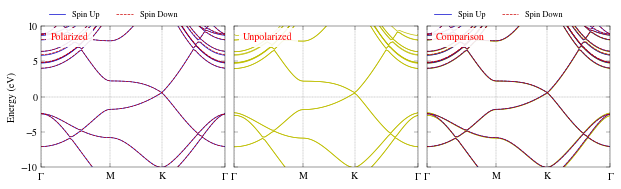

In [ ]:
import pivotpy.vr_parser as vp
vr1=vp.export_vasprun(path=f1)
vr2=vp.export_vasprun(path=f2)
import pivotpy.s_plots as sp
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,3,figsize=(10.2,2.6),sharey=True)
ax0=sp.plot_bands(ax=ax[0],kpath=vr2.kpath,bands=vr2.bands,showlegend=True)

ax1=sp.plot_bands(ax=ax[1],kpath=vr1.kpath,bands=vr1.bands,color1='y')

ax2=sp.plot_bands(ax=ax[2],kpath=vr1.kpath,bands=vr1.bands,color1='y')
ax2=sp.plot_bands(ax=ax[2],kpath=vr2.kpath,bands=vr2.bands,showlegend=True)
xticks=[vr1.kpath[i] for i in [0,30,60,-1]]
txts=["Polarized","Unpolarized","Comparison"]
for axes,txt in zip(ax,txts):
    if axes==ax0:
        sp.modify_axes(ax=axes,ylabel='Energy (eV)')
    sp.modify_axes(ax=axes,ylim=[-10,10],xlim=[xticks[0],xticks[-1]],xticks=xticks,xt_labels=[r'$\Gamma$','M','K',r'$\Gamma$'])
    axes.text(0.05,0.9,txt,bbox=dict(edgecolor='white',facecolor='white', alpha=0.9),transform=axes.transAxes,color='red')
plt.subplots_adjust(hspace=0.01,wspace=0.05)


In [ ]:
#export
def quick_bplot(path_evr=None,ax=None,skipk=None,joinPathAt=[],elim=[],xt_indices=[],\
            xt_labels=[],E_Fermi=None,figsize=(3.4,2.6),txt=None,xytxt=[0.05,0.9],ctxt='black'):
    """
    - Returns axes object and plot on which all matplotlib allowed actions could be performed.
    - **Parameters**
        - path_evr   : path/to/vasprun.xml or output of `export_vasprun`. Auto picks in CWD.
        - ax         : Matplotlib axes object, if not given, one is created.
        - skipk      : Number of kpoints to skip, default will be from IBZKPT.
        - joinPathAt : Points where kpath is broken.
        - elim       : [min,max] of energy range.
        - E_Fermi    : If not given, automatically picked from `export_vasprun`.
        - xt_indices : High symmetry kpoints indices.abs
        - xt_labels  : High Symmetry kpoints labels.
        - **kwargs   : figsize=(3.4,2.6). Text,its position and color.
    - **Returns**
        - ax : matplotlib axes object with plotted bands.
    """
    import pivotpy.vr_parser as vp
    import pivotpy.s_plots as sp
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    from matplotlib import rc
    mpl.rcParams['axes.linewidth'] = 0.4 #set the value globally
    mpl.rcParams['font.serif'] = "STIXGeneral"
    mpl.rcParams['font.family'] = "serif"
    mpl.rcParams['mathtext.fontset'] = "stix"
    #checking type of given path.
    if(path_evr==None):
        vr=vp.export_vasprun(path=path_evr,skipk=skipk,elim=elim,joinPathAt=joinPathAt)
    if(path_evr!=None):
        from os import path as pt
        if(type(path_evr)==vp.Dict2Data):
            vr=path_evr
        elif(pt.isfile(path_evr)):
            vr=vp.export_vasprun(path=path_evr,skipk=skipk,elim=elim,joinPathAt=joinPathAt)
        else:
            return print("path_evr = `{}` does not exist".format(path_evr))
    # Apply a robust final check.
    try:
        vr.bands;vr.kpath
    except:
        return print("Object: \n{} \nis like a lower tree of export_vasprun(). Expects top tree.".format(vr))
    else:
        # Main working here.
        K=vr.kpath
        xticks=[K[i] for i in xt_indices]
        xlim=[min(K),max(K)]
        if(elim):
            ylim=[min(elim),max(elim)]
        else:
            ylim=[]
        if(ax==None):
            fig,ax=plt.subplots(1,1,figsize=figsize)
        sp.modify_axes(ax=ax,ylabel='Energy (eV)',xticks=xticks,xt_labels=xt_labels,xlim=xlim,ylim=ylim)
        sp.plot_bands(ax=ax,kpath=K,bands=vr.bands,showlegend=True,E_Fermi=E_Fermi,lw1=0.9)
        if(txt!=None):
            ax.text(*xytxt,txt,bbox=dict(edgecolor='white',facecolor='white', alpha=0.9),transform=ax.transAxes,color=ctxt)
        else:
            ax.text(*xytxt,vr.sys_info.SYSTEM,bbox=dict(edgecolor='white',facecolor='white', alpha=0.9),transform=ax.transAxes,color=ctxt)

        return ax

In [ ]:
#export
def add_text(ax=None,xs=0.05,ys=0.9,txts='[List]',colors='r'):
    """
    - Adds text entries on axes, given single string or list.
    - **Parameters**
        - xs    : List of x coordinates relative to axes or single coordinate.
        - ys    : List of y coordinates relative to axes or single coordinate.
        - txts  : List of strings or one string.
        - colors: List of x colors of txts or one color.
    """
    if(ax==None):
        raise ValueError("Matplotlib axes (ax) is not given.")
    else:
        import matplotlib as mpl
        from matplotlib import rc
        mpl.rcParams['font.serif'] = "STIXGeneral"
        mpl.rcParams['font.family'] = "serif"
        mpl.rcParams['mathtext.fontset'] = "stix"
        if(type(txts)==str):
            ax.text(xs,ys,txts,bbox=dict(edgecolor='white',facecolor='white', alpha=0.9),transform=ax.transAxes,color=colors)
        if(type(txts)==list):
            for x,y,txt,color in zip(xs,ys,txts,colors):
                ax.text(x,y,txt,bbox=dict(edgecolor='white',facecolor='white', alpha=0.9),transform=ax.transAxes,color=color)
    return None

Below is example where you can add multiple text entries on a `quick_bplot`.

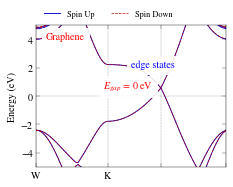

In [ ]:
ax=sp.quick_bplot(path_evr=f2,elim=[-5,5],xt_indices=[0,30,60,-1],xt_labels=['W','K',''],txt='Graphene',ctxt='r')
sp.add_text(ax=ax,xs=[0.35,0.5],ys=[0.55,0.7],txts=[r'$E_{gap}$ = 0 eV','edge states'],colors=['red','blue'])

In [ ]:
#export
def add_legend(ax=None,colors=[],labels=[],styles='solid',\
                widths=0.7,anchor=(0,1), ncol=3,loc='lower left',fontsize='small',frameon=False,**legend_kwargs):
    """
    - Adds custom legeneds on a given axes,returns None.
    - **Parameters**
        - ax       : Matplotlib axes.
        - colors   : List of colors.
        - labels   : List of labels.
        - styles   : str or list of line styles.
        - widths   : str or list of line widths.
        - **kwargs : Matplotlib's legend arguments.
    """
    if(ax==None):
        raise ValueError("Matplotlib axes (ax) is not given.")
    else:
        import matplotlib.pyplot as plt
        from matplotlib import rc
        import matplotlib as mpl
        mpl.rcParams['font.serif'] = "STIXGeneral"
        mpl.rcParams['font.family'] = "serif"
        mpl.rcParams['mathtext.fontset'] = "stix"
        if(type(widths)==float or type(widths)==int):
            if(type(styles)==str):
                for color,label in zip(colors,labels):
                    ax.plot([],[],color=color,lw=widths,linestyle=styles,label=label)
            else:
                for color,label,style in zip(colors,labels,styles):
                    ax.plot([],[],color=color,lw=widths,linestyle=style,label=label)
        else:
            if(type(styles)==str):
                for color,label,width in zip(colors,labels,widths):
                    ax.plot([],[],color=color,lw=width,linestyle=styles,label=label)
            else:
                for color,label,width,style in zip(colors,labels,widths,styles):
                    ax.plot([],[],color=color,lw=width,linestyle=style,label=label)
        ax.legend(fontsize=fontsize,frameon=frameon,ncol=ncol, bbox_to_anchor=anchor, loc=loc,**legend_kwargs)
    return None

In [ ]:
#export
def add_colorbar(ax=None,colors=[],N=256,scales = [1,1,1],ticks=[1/6,1/2,5/6],\
            ticklabels=['r','g','b'],vertical=False,fontsize=8):
    """
    - Plots colorbar on a given axes. This axes should be only for colorbar. Returns None but registers a color map `_hsv_` in matplotlib.
    - **Parameters**
        - ax         : Matplotlib axes object.
        - colors     : List of colors in colorbar, if not given, RGB colorbar is added.
        - N          : int, number of color points Default 256.
        - scales     : List of 3 numbers in interval [0,1] to scale colors.
        - ticks      : List of tick values to show on colorbar in interval [0,1].
        - ticklabels : List of labels for ticks.
        - vertical   : Boolean, default is Fasle.
        - fontsize   : Default 8. Adjustable according to plot space.
    """
    if(ax==None):
        raise ValueError("Matplotlib axes (ax) is not given.")
    else:
        import matplotlib as mpl
        from matplotlib import rc
        import matplotlib.pyplot as plt
        from matplotlib.colors import LinearSegmentedColormap as LSC
        import numpy as np
        mpl.rcParams['font.serif'] = "STIXGeneral"
        mpl.rcParams['font.family'] = "serif"
        mpl.rcParams['mathtext.fontset'] = "stix"
        
        if colors==[]:
            colors=np.array([[1,0,1],[1,0,0],[1,1,0],[0,1,0],[0,1,1],[0,0,1],[1,0,1]])
        if len(scales)==3:
            colors = np.multiply(colors,scales)
        _hsv_ = LSC.from_list('RGB',colors=colors,N=N)
        plt.register_cmap('_hsv_',_hsv_)
        c_vals = np.linspace(0,1,N)
        c_vals = np.vstack((c_vals,c_vals))

        ticks_param = dict(direction='out',length=2,width=0.3,top=False,right=False,
                            grid_color=(1,1,1,0), grid_alpha=0)
        if(vertical==False):
            ax.imshow(c_vals,aspect='auto',cmap=_hsv_,origin='lower')
            ax.set_yticks([])
            ax.set_xticks([np.floor(N*t) for t in ticks])
            ax.set_xticklabels(ticklabels,rotation=0)
            ticks_param.update({'left':False})
            ax.tick_params(**ticks_param)
        if(vertical==True):
            c_vals = c_vals.transpose()
            ax.imshow(c_vals,aspect='auto',cmap=_hsv_,origin='lower')
            ax.set_xticks([])
            ax.set_yticks([np.floor(N*t) for t in ticks])
            ax.set_yticklabels(ticklabels,rotation=90)
            ticks_param.update({'bottom':False})
            ax.tick_params(**ticks_param)
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(fontsize)
        for child in ax.get_children():
            if isinstance(child, mpl.spines.Spine):
                child.set_color((1,1,1,0.4))

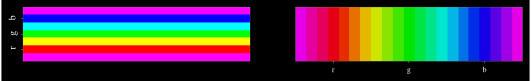

In [ ]:
import pivotpy.s_plots as sp
import matplotlib.pyplot as plt 
plt.style.use('dark_background')
fig,ax=plt.subplots(1,2,figsize=(9,1))
add_colorbar(ax=ax[0],vertical=True,N=7)
add_colorbar(ax=ax[1],scales=[0.9,0.9,0.9],N=21)

## Including Atomic and Orbital Projections

In [ ]:
#export
def create_rgb_lines(ax         = None,
                    kpath       = None,
                    evals_set   = None,
                    pros_set    = None,
                    ions        = [0],
                    orbs        = [[0],[],[]],
                    labels   = ['','',''],
                    uni_width   = False,
                    max_width   = 2.5,
                    uni_color   = False,
                    color       = 'red',
                    interpolate = False,
                    n           = 5,
                    k           = 3,
                    scale_color = False
    ):
    """
    - Plot on a given axes or returns line collection, lines and colors if axes is None, which can be added to an ax only onces,by using `ax.add_collection(collection)` and then `ax.autoscale_view()` will make it visible.
    - **Parameters**
        - ax       : Matplotlib axes object, if not given, linecollection is returned.
        - kapath   : `export_vasprun`().kpath or `get_kpts`().kpath.
        - evals_set: `export_vasprun`().bands.evals or `get_evals`().evals. If calculations are spin-polarized, it will be `...evals.SpinUp/SpinDown` for both. You need to create collections twice for SpinUp and SpinDown separately.
        - pros_set : `export_vasprun().pro_bands.pros` or `get_bands_pro_set`().pros. If calculations are spin-polarized, it will be `...pros.SpinUp/SpinDown` for both. You need to create collections twice for SpinUp and SpinDown separately.
        - ions     : List of ions to project on, could be `range(start,stop,step)` as well, remember that `stop` is not included in python. so `range(0,2)` will generate 0 and 1 indices.
        - orbs     : List of three lists of orbitals indices. `[[red],[green],[blue]]`, you can create any color by this combination. For example, to get `s-orbital in yellow color`, you will use `[[0],[0],[]]`. Do not remove empty list from there, it will not effect your orbital selection.
        - uni_width: If True, will keep equal `width=max_width/2` of lines.
        - max_width: Default is 5. Orbitals' projections are added and Normalized to this thickness.
        - uni_color: If True, will not change color in a band from point to point,width is reduced.
        - color    : (str,rgb,rgba), if `uni_color=True`, color will be applied to line.
        - interpolate: Deafult is false, if True, it will add n points between nearest kpoints.
        - n        : int, default is 5. Adds n points between nearest kpoints.
        - k        : int, order of interpolation, defualt is 3. `n > k` should be hold.
        - scale_color: If True, colors are scaled to 1 at each points.
    - **Returns**
        - line collection : Matplotlib line collection object.
        - line patches    : An (N,2,2) dimensional arry.
        - colors          : An (N,4) or (N,3) dimensional list.(Not scaled.)
    - **Exception**
        - If `uni_color` and `uni_width` are True together, this leads to simple plot. No collections will be created. Use `bands_plot()` instead.

    """
    if(pros_set==[]):
        import pivotpy.g_utils as gu
        gu.printy("Can not plot an empty eigenvalues object.")
        return gu.printg("Try with large energy range.")
    if(len(orbs)<3):
        raise ValueError("orbs have structure [[],[],[]], do not reduce structure even if it is empty.")
    elif(uni_width==True and uni_color==True):
        raise ResourceWarning("Keeping `uni_width=True` and `uni_color=True` together is misuse of the system resources, either keep one of them False to proceed or consider using simple plot functions.")
    else:
       import numpy as np
       import matplotlib as mpl
       from matplotlib.collections import LineCollection
       pros=np.take(pros_set,list(ions),axis=0).sum(axis=0)
       if(interpolate==True):
           from pivotpy import g_utils as gu
           knew,evals=gu.interpolate_data(kpath,evals_set,n=n,k=k)
           pros=gu.interpolate_data(kpath,pros,n=n,k=k)[1].clip(min=0)
       else:
           knew,evals,pros=kpath,evals_set,pros
       pros=pros[1:,:,:]+pros[:-1,:,:]
       r=np.take(pros,orbs[0],axis=2).sum(axis=2)
       g=np.take(pros,orbs[1],axis=2).sum(axis=2)
       b=np.take(pros,orbs[2],axis=2).sum(axis=2)
       max_c=max(max(map(max,r[:,:])),max(map(max,g[:,:])),max(map(max,b[:,:])))
       if(max_c==0):
           max_c=1 # Avoid divide by 0.
       #r=r[:,:]/max_c;g=g[:,:]/max_c;b=b[:,:]/max_c #Values are ready in E_Limit
       _cl=np.concatenate((r,g,b)).reshape((3,-1,np.shape(r)[1])).transpose().reshape((-1,3))
       cl=_cl/max_c
       if(scale_color==True):
           cl_max=np.max(_cl,axis=1)
           # avoid divide by zero. Contributions are 4 digits only.
           cl_max = [1 if c==0.0 else c for c in cl_max]
           cl=np.array([c/c_max for c,c_max in zip(_cl,cl_max)])
       clrs=[tuple((cl[i,0],cl[i,1],cl[i,2],1)) for i in range(np.shape(cl)[0])]
       if(uni_width==True):
           lws=(max_width/2)
       else:
           _lw=max_width*np.sum(cl,axis=1)
           _max_lw=np.max(_lw)
           if(_max_lw<0.0000001):
               _max_lw=1  # avoid double_scalar error issue
           lws=0.1+_lw/_max_lw
       if(uni_color==True):
           _pro=np.unique(cl,axis=1).sum(axis=1) #avoid double counting
           pro=_pro/np.max(_pro)
           lws=0.1+pro*max_width*max_c #max_c normalizes automatically if multiple lines plotted.
           clrs=(color)
       kgrid=np.repeat(knew,np.shape(evals)[1],axis=0).reshape((-1,np.shape(evals)[1]))
       narr=np.concatenate((kgrid,evals),axis=0).reshape((2,-1,np.shape(evals)[1]))
       marr=np.concatenate((narr[:,:-1,:],narr[:,1:,:]),axis=0).transpose().reshape((-1,2,2))
       lc=LineCollection(marr,colors=(clrs),linewidths=lws)
       # Add to axis or return if not provided one.
       if(ax!=None):
           ax.add_collection(lc)
           ax.autoscale_view()
       else:
            return lc,marr,_cl

## Using `create_rgb_line` in object oriented way.
- The below example let's user know how to connect pieces of objects to create a complex figure. Note that in case of adding multiple collections on an axes,(left figure),what you see depends on what was the order of adding collections on each other. Also multiple lines are automatically normalized to real data if they have same `max_width`, so you can compare, say, `s` line and `p` line with each other.

In [ ]:
import time
start=time.time()
import numpy as np 
import pivotpy.vr_parser as vp
path='E:/Research/graphene_example/ISPIN_2/bands/vasprun.xml'
vr=vp.export_vasprun(path=path,elim=[-10,10])
k=vr.kpath
ef=vr.tdos.E_Fermi
en=vr.bands.evals.SpinUp-ef
pros=vr.pro_bands.pros.SpinUp

Loading from PowerShell Exported Data...


No handles with labels found to put in legend.


Executed in 0.6590940952301025 seconds.


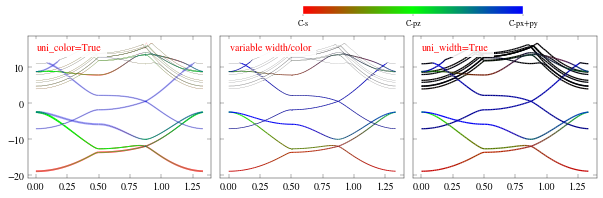

In [ ]:
import pivotpy.s_plots as sp 
import matplotlib.pyplot as plt 
fig1,ax = plt.subplots(1,3,figsize=(10.2,2.6),sharey=True)
axc     = fig1.add_axes([0.5,1,0.3,0.04])
C1      = range(0,1)
spd     = [[0],[1],[2,3]]
sp.create_rgb_lines(ax=ax[0],kpath=k,evals_set=en,pros_set=pros,interpolate=True,n=15,uni_color=True,orbs=[[0],[0],[0]],ions=C1)
sp.create_rgb_lines(ax=ax[0],kpath=k,evals_set=en,pros_set=pros,\
        uni_color=True,color=(0,1,0,1),orbs=[[],[1],[]],ions=C1)
sp.create_rgb_lines(ax=ax[0],kpath=k,evals_set=en,pros_set=pros,uni_color=True,color=(0,0,1,0.4),orbs=[[],[],[2,3]],ions=C1)
sp.create_rgb_lines(ax=ax[1],kpath=k,evals_set=en,pros_set=pros,orbs=spd,ions=C1)
sp.create_rgb_lines(ax=ax[2],kpath=k,evals_set=en,pros_set=pros,\
        uni_width=True,orbs=spd,ions=C1)
[sp.modify_axes(ax=axes) for axes in ax]
sp.add_legend(ax=ax[0],labels=['C-s','C-pz','C-px+py'],widths=4)
sp.add_colorbar(ax=axc,colors=[(1,0,0),(0,1,0),(0,0,1)],ticklabels=['C-s','C-pz','C-px+py'],ticks=[0,100,200],n=100,linewidth=2)
plt.subplots_adjust(wspace=0.05)
txts=['uni_color=True','variable width/color','uni_width=True']
[sp.add_text(ax=axes,txts=txt) for axes,txt in zip(ax,txts)];
print('Executed in {} seconds.'.format(time.time()-start))


In [ ]:
#export
def quick_rgb_lines(path_evr    = None,
                    ax          = None,
                    skipk       = None,
                    joinPathAt  = [],
                    elim        = [],
                    elements    = [[0],[],[]],
                    orbs        = [[0],[],[]],
                    labels      = ['Elem0-s','',''],
                    max_width   = 2.5,
                    xt_indices  = [0,-1],
                    xt_labels   = [r'$\Gamma$','M'],
                    E_Fermi     = None,
                    figsize     = (3.4,2.6),
                    txt         = None,
                    xytxt       = [0.05,0.9],
                    ctxt        = 'black',
                    uni_width   = False,
                    interpolate = False,
                    spin        = 'both',
                    n           = 5,
                    k           = 3,
                    scale_color = True,
                    colorbar    = True,
                    color_matrix= None,
    ):
    """
    - Returns axes object and plot on which all matplotlib allowed actions could be performed. In this function,orbs,labels,elements all have list of length 3. Inside list, sublists or strings could be any length but should be there even if empty.
    - **Parameters**
        - path_evr   : path/to/vasprun.xml or output of `export_vasprun`. Auto picks in CWD.
        - ax         : Matplotlib axes object, if not given, one is created.
        - skipk      : Number of kpoints to skip, default will be from IBZKPT.
        - joinPathAt : Points where kpath is broken.
        - elim       : [min,max] of energy range.
        - E_Fermi    : If not given, automatically picked from `export_vasprun`.
        - xt_indices : High symmetry kpoints indices.abs
        - xt_labels  : High Symmetry kpoints labels.
        - elements   : List [[0],[],[]] by default and plots s orbital of first ion..
        - orbs       : List [[r],[g],[b]] of indices of orbitals, could be empty, but shape should be same.
        - labels     : List [str,str,str] of projection labels. empty string should exist to maintain shape. Auto adds `↑`,`↓` for ISPIN=2.
        - max_width  : Width to scale whole projections. if `uni_width=True, width=max_width/2`.
        - figsize    : Tuple (width,height) in inches. Default (3.4.2.6) is article column's width.
        - txt        : Text on figure, if None, SYSTEM's name is printed.
        - xytxt      : [x_coord,y_coord] of text relative to axes.
        - ctxt       : color of text.
        - uni_width  : If True, width of bands kept uniform.
        - uni_color  : If True, color of bands kept same.
        - color      : (str,rgb,rgba), if `uni_color=True`, color is applied.
        - spin       : Plot spin-polarized for spin {'up','down','both'}. Default is both.
        - interpolate: Default is False, if True, bands are interpolated.
        - n          : int, number of points, default is 5.
        - k          : int, order of interpolation 0,1,2,3. Defualt 3. `n > k` should be hold.
        - scale_color: Boolean. Default True, colors are scaled to 1 at each point.
        - colorbar   : Default is True. Displays a vertical RGB colorbar.
        - color_matrix: 9x9 numpy array or list to transform from RGB to another space,sum of each row element should be <= 1. For simply changing the color intensity use np.diag([r,g,b]) with r,g,b interval in [0,1]. Try [[0.5  , 0  , 0.5],[0.5  , 0.5, 0. ],[0.  , 0.5  , 0.5 ]] as a suggested color matrix!
    - **Returns**
        - ax : matplotlib axes object with plotted projected bands.
    """
    import pivotpy.vr_parser as vp
    import pivotpy.s_plots as sp
    from matplotlib.collections import LineCollection
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    from matplotlib import rc
    mpl.rcParams['axes.linewidth'] = 0.4 #set the value globally
    mpl.rcParams['font.serif'] = "STIXGeneral"
    mpl.rcParams['font.family'] = "serif"
    mpl.rcParams['mathtext.fontset'] = "stix"
    #checking type of given path.
    if(path_evr==None):
        vr=vp.export_vasprun(path=path_evr,skipk=skipk,elim=elim,joinPathAt=joinPathAt)
    if(path_evr!=None):
        from os import path as pt
        if(type(path_evr)==vp.Dict2Data):
            vr=path_evr
        elif(pt.isfile(path_evr)):
            vr=vp.export_vasprun(path=path_evr,skipk=skipk,elim=elim,joinPathAt=joinPathAt)
        else:
            return print("path_evr = `{}` does not exist".format(path_evr))
    # Apply a robust final check.
    try:
        vr.bands;vr.kpath
    except:
            return print("Object: \n{} \nis like a lower tree of export_vasprun(). Expects top tree.".format(vr))
    else:
        ## Main working here.
        if(vr.pro_bands==None):
            import pivotpy.g_utils as gu
            gu.printy("Can not plot an empty eigenvalues object.")
            return gu.printg("Try with large energy range.")
        if not spin in ('up','down','both'):
            raise ValueError(
                "spin can take `up`,`down` or `both` values only.")
            return
        colorbar_scales = [1,1,1] # default for colorbar
        def _re_collect(ax,arr,clr1,clr2,clr3,max_width=5, uni_width=uni_width):
                _cl=[[c1[0],c2[1],c3[2]] for c1,c2,c3 in zip(clr1,clr2,clr3)]
                import numpy as np
                if(scale_color==True):
                    cl_max=np.max(_cl,axis=1)
                    # avoid divide by zero. Contributions are 4 digits only.
                    cl_max = [1 if c==0.0 else c for c in cl_max]
                    cl=np.array([np.array(c)/c_max for c,c_max in zip(_cl,cl_max)])
                else:
                    cl=np.array(_cl)/np.max(np.unique(_cl))
                    
                if None not in np.unique(color_matrix) and np.size(color_matrix)==9:
                    cl = np.dot(color_matrix,cl.T).T #Order is important
            
                clrs=cl # Finally assign to colors. 
                colorbar_scales[:] = np.max(clrs,axis=0) #assign color weights
                if(uni_width==True):
                    lws=(max_width/2)
                else:
                    lws=np.sum(_cl,axis=1)
                    lws=0.1+max_width*lws/np.max(lws)
                lc=LineCollection(arr,colors=clrs,linewidths=lws)
                ax.add_collection(lc)
                ax.autoscale_view()
                return lc
        #=====================================================
        orbs=[[item] if type(item)==int else item for item in orbs] #Fix if integer given.
        elem_inds = vr.sys_info.ElemIndex
        max_ind   = elem_inds[-1]-1 # Last index is used for range in ElemIndex, not python index.
        for i,elem in enumerate(elements.copy()):
            if(type(elem)==int):
                if(elem <= max_ind):
                    elements[i]=range(elem_inds[elem],elem_inds[elem+1])
                else:
                    return print("index {} is out of bound for ions of length {}".format(elem,max_ind+1))

        if(E_Fermi==None):
            E_Fermi=vr.bands.E_Fermi
        K=vr.kpath
        xticks=[K[i] for i in xt_indices]
        xlim=[min(K),max(K)]
        if(elim):
            ylim=[min(elim),max(elim)]
        else:
            ylim=[]

        nfields=len(vr.pro_bands.labels)
        if(ax==None):
            fig,ax=plt.subplots(1,1,figsize=figsize)

        # After All Fixing
        ISPIN=vr.sys_info.ISPIN
        args_dict=dict(uni_color=False,orbs=orbs,scale_color=scale_color,interpolate=interpolate,n=n,k=k,max_width=max_width) # Do not scale color there, scale here.
        if(ISPIN==1):
            En=vr.bands.evals-E_Fermi
            Pros=vr.pro_bands.pros
            new_args=dict(kpath=K, evals_set=En, pros_set=Pros,**args_dict)
            l_r=[sp.create_rgb_lines(ions=elem,**new_args) for elem in elements]
            _re_collect(ax,l_r[0][1],l_r[0][2],l_r[1][2],l_r[2][2],max_width=max_width,uni_width=uni_width)
        if(ISPIN==2):
            En1=vr.bands.evals.SpinUp-E_Fermi
            En2=vr.bands.evals.SpinDown-E_Fermi
            Pros1=vr.pro_bands.pros.SpinUp
            Pros2=vr.pro_bands.pros.SpinDown
            if(spin=='up'):
                new_args=dict(kpath=K, evals_set=En1, pros_set=Pros1,**args_dict)
                l_r=[sp.create_rgb_lines(ions=elem,**new_args) for elem in elements]
                _re_collect(ax,l_r[0][1],l_r[0][2],l_r[1][2],l_r[2][2],max_width=max_width,uni_width=uni_width)
            if(spin=='down'):
                new_args=dict(kpath=K, evals_set=En2, pros_set=Pros2,**args_dict)
                l_r=[sp.create_rgb_lines(ions=elem,**new_args) for elem in elements]
                _re_collect(ax,l_r[0][1],l_r[0][2],l_r[1][2],l_r[2][2],max_width=max_width,uni_width=uni_width)
            if(spin=='both'):
                # Plotting Up
                new_args1=dict(kpath=K, evals_set=En1, pros_set=Pros1,**args_dict)
                l_r1=[sp.create_rgb_lines(ions=elem,**new_args1) for elem in elements]
                _re_collect(ax,l_r1[0][1],l_r1[0][2],l_r1[1][2],l_r1[2][2],max_width=max_width,uni_width=uni_width)
                # Plotting Down
                new_args2=dict(kpath=K, evals_set=En2, pros_set=Pros2,**args_dict)
                l_r2=[sp.create_rgb_lines(ions=elem,**new_args2) for elem in elements]
                _re_collect(ax,l_r2[0][1],l_r2[0][2],l_r2[1][2],l_r2[2][2],max_width=max_width,uni_width=uni_width)
        x,y=[*xytxt]
        if(txt==None):
            txt=vr.sys_info.SYSTEM
        sp.add_text(ax=ax,xs=x,ys=y,txts=txt,colors=ctxt)
        sp.modify_axes(ax=ax,xticks=xticks,xt_labels=xt_labels,xlim=xlim,ylim=ylim)
        if colorbar:
            _tls_ = ['' for l in labels] # To avoid side effects, new labels array.
            for i,label in enumerate(labels):
                if label and ISPIN==2:
                    _tls_[i] = (label+'$^↑$' if spin=='up' else label+'$^↓$' if spin=='down' else label+'$^{↑↓}$')
            w, h = plt.gcf().get_size_inches()
            w_f = 0.15/w # width of colorbar relative to fontsize=8
            pos = ax.get_position()
            # Make colobar space available from given axis itself
            ax.set_position([pos.x0,pos.y0,pos.width-2.8*w_f,pos.height])
            new_pos = [pos.x0+pos.width-w_f,pos.y0,w_f,pos.height]
            axb = plt.gcf().add_axes(new_pos)
            _colors_ = np.multiply([[1,0,1],[1,0,0],[1,1,0],[0,1,0],[0,1,1],
                                    [0,0,1],[1,0,1]],colorbar_scales)
            if None not in np.unique(color_matrix) and np.size(color_matrix)==9:
                _colors_ = np.dot(color_matrix,_colors_.T).T
            sp.add_colorbar(ax=axb,vertical=True,ticklabels=_tls_,colors = _colors_)
        return ax

- **quick_rgb_lines()** is waraper around `create_rgb_lines(uni_color=False)`. You can pass lists for `orbs`,`labels`,`colors` and `elements` eeach of length 3 with one axis. 
    - If you do not provide any arguemnts, this will create graph of whole system projections over s,p,d orbitals.
    - `elements` argument is special, you can pass index of element which will pick all ions of that type, or list(length=3) of indices of ions, e.g in `elements=[0,[0,1],2]` of system Ga`32`As`31`Bi`1`, 0 and 2 pick all ions of Ga and Bi respectively, while [0,1] will pick first two ions of Ga.
    - If `scale_color=True`, ecah point on plot is scaled to maximum color, if `False`, whole plot is scaled.
    - `color_matrix` is to convert between color spaces and play around as you can. Sum of each row should be less than or equal to 1.
> Tip: Gray scale matrix = [[0.3  , 0.5  , 0.2],[0.3  , 0.5, 0.2 ],[0.3  , 0.5  , 0.2 ]]  
> Tip: Kind of body centered cubic matrix = [[0.5  , 0  , 0.5],[0.5  , 0.5, 0. ],[0.  , 0.5  , 0.5 ]]

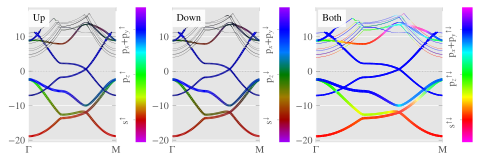

In [ ]:
import os
import numpy as np
os.chdir('E:/Research/graphene_example/ISPIN_2/bands')
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pivotpy.s_plots as sp
labels=['s','p$_z$','p$_x$+p$_y$']
axs=sp.init_figure(nrows=1,ncols=3,figsize=(8,2.5),widths=[3,3,4]);
quick_rgb_lines(ax=axs[0],elements=[0,[0,1],[0,1]],orbs=[0,[1],[2,3]],spin='up',txt='Up',colorbar=True,labels=labels,scale_color=False)
quick_rgb_lines(ax=axs[1],elements=[0,[0,1],[0,1]],orbs=[0,[1],[2,3]],spin='down',txt='Down',colorbar=True,scale_color=False,labels=labels,color_matrix=np.diag([0.9,0.7,1]))
quick_rgb_lines(ax=axs[2],elements=[0,[0,1],[0,1]],orbs=[0,[1],[2,3]],spin='both',txt='Both',colorbar=True,labels=labels)

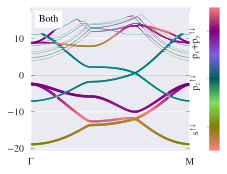

In [ ]:
plt.style.use(['default','seaborn'])
_ = quick_rgb_lines(elements=[0,[0,1],[0,1]],orbs=[0,[2],[1,3]],spin='both',txt='Both',colorbar=True,labels=labels,
color_matrix=[[0.5  , 0  , 0.5],
              [0.5  , 0.5, 0. ],
              [0.  , 0.5  , 0.5 ]])

In [ ]:
#export
def quick_color_lines(path_evr  = None,
                    axes        = None,
                    skipk       = None,
                    joinPathAt  = [],
                    elim        = [],
                    elements    = [[0],],
                    orbs        = [[0],],
                    labels      = ['s',],
                    color_map   = 'gist_rainbow',
                    max_width   = 2.5,
                    xt_indices  = [0,-1],
                    xt_labels   = [r'$\Gamma$','M'],
                    E_Fermi     = None,
                    showlegend  = True,
                    figsize     = (3.4,2.6),
                    txt         = None,
                    xytxt       = [0.05,0.85],
                    ctxt        = 'black',
                    spin        = 'both',
                    interpolate = False,
                    n           = 5,
                    k           = 3,
                    legend_kwargs={'ncol'           : 4,
                                   'anchor'         : (0,0.85),
                                   'handletextpad'  : 0.5,
                                   'handlelength'   : 1,
                                   'fontsize'       : 'small',
                                   'frameon'        : True
                                   },
                    **subplots_adjust_kwargs
    ):
    """
    - Returns axes object and plot on which all matplotlib allowed actions could be performed. If given, axes,elements,orbs colors, and labels must have same length. If not given, zeroth ion is plotted with s-orbital.
    - **Parameters**
        - path_evr   : Path/to/vasprun.xml or output of `export_vasprun`. Auto picks in CWD.
        - axes       : Matplotlib axes object with one or many axes, if not given, auto created.
        - skipk      : Number of kpoints to skip, default will be from IBZKPT.
        - joinPathAt : Points where kpath is broken.
        - elim       : [min,max] of energy range.
        - E_Fermi    : If not given, automatically picked from `export_vasprun`.
        - xt_indices : High symmetry kpoints indices.abs
        - xt_labels  : High Symmetry kpoints labels.
        - elements   : List [[0],], by defualt and plot first ion's projections.
        - orbs       : List [[0],] lists of indices of orbitals, could be empty.
        - labels     : List [str,] of orbitals labels. len(labels)==len(orbs) must hold.  Auto adds `↑`,`↓` for ISPIN=2.
        - color_map  : Matplotlib's standard color maps. Default is 'gist_ranibow'.
        - showlegend : True by defualt.
        - max_width  : Width to scale whole projections. if `uni_width=True, width=max_width/2`.
        - figsize    : Tuple (width,height) in inches. Default (3.4.2.6) is article column's width.
        - txt        : Text on figure, if None, SYSTEM's name is printed.
        - xytxt      : [x_coord,y_coord] of text relative to axes.
        - ctxt       : color of text.
        - spin       : Plot spin-polarized for spin {'up','down','both'}. Default is both.
        - interpolate: Default is False, if True, bands are interpolated.
        - n          : int, number of points, default is 5.
        - k          : int, order of interpolation 0,1,2,3. Defualt 3. `n > k` should be hold.
        - legend_kwargs: Dictionary to contain legend arguments to fix.
        - **subplots_adjust_kwargs : plt.subplots_adjust parameters.
    - **Returns**
        - ax : matplotlib axes object with plotted projected bands.
    """
    import numpy as np
    import pivotpy.vr_parser as vp
    import pivotpy.s_plots as sp
    import pivotpy as pp
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    from matplotlib import rc
    mpl.rcParams['axes.linewidth'] = 0.4 #set the value globally
    mpl.rcParams['font.serif'] = "STIXGeneral"
    mpl.rcParams['font.family'] = "serif"
    mpl.rcParams['mathtext.fontset'] = "stix"
    #checking type of given path.
    if(path_evr==None):
        vr=vp.export_vasprun(path=path_evr,skipk=skipk,elim=elim,joinPathAt=joinPathAt)
    if(path_evr!=None):
        from os import path as pt
        if(type(path_evr)==vp.Dict2Data):
            vr=path_evr
        elif(pt.isfile(path_evr)):
            vr=vp.export_vasprun(path=path_evr,skipk=skipk,elim=elim,joinPathAt=joinPathAt)
        else:
            return print("path_evr = `{}` does not exist".format(path_evr))
    # Apply a robust final check.
    try:
        vr.bands;vr.kpath
    except:
        return print("Object: \n{} \nis like a lower tree of export_vasprun(). Expects top tree.".format(vr))
    else:
        # Main working here.
        if(vr.pro_bands==None):
            import pivotpy.g_utils as gu
            gu.printy("Can not plot an empty eigenvalues object.")
            return gu.printg("Try with large energy range.")
        if not spin in ('up','down','both'):
            raise ValueError(
                "spin can take `up`,`down` or `both` values only.")
            return
        orbs=[[item] if type(item)==int else item for item in orbs] #Fix if integer given.
        elem_inds = vr.sys_info.ElemIndex
        max_ind   = elem_inds[-1]-1 # Last index is used for range in ElemIndex, not python index.
        for i,elem in enumerate(elements.copy()):
            if(type(elem)==int):
                if(elem <= max_ind):
                    elements[i]=range(elem_inds[elem],elem_inds[elem+1])
                else:
                    return print("index {} is out of bound for ions of length {}".format(elem,max_ind+1))
        if(E_Fermi==None):
            E_Fermi=vr.bands.E_Fermi
        K=vr.kpath
        xticks=[K[i] for i in xt_indices]
        xlim=[min(K),max(K)]
        if(elim):
            ylim=[min(elim),max(elim)]
        else:
            ylim=[]

        nfields = len(vr.pro_bands.labels)

        # First fix orbitals
        if(len(elements)!=len(orbs)):
            raise ValueError("elements and orbs expect same length even if their entries are empty.")
            return
        # Fix elements and labels length
        if(len(elements)!=len(labels)):
            raise ValueError("elements and labels expect same length even if their entries are empty.")
            return
        # Fix elements and colors length. ISPIN 2 case is done in loop itself
        if color_map in plt.colormaps():
            from matplotlib.pyplot import cm
            c_map = cm.get_cmap(color_map)
            c_vals = np.linspace(0,1,len(orbs))
            colors  = c_map(c_vals)
        else:
            return print("`color_map` expects one of the follwoing:\n{}".format(plt.colormaps()))

        # Unpack given axes to list.
        try:
            axes=np.reshape(axes,(-1))
        except ValueError:
            axes=[]
        if(not axes.any()):
            axes=sp.init_figure(figsize=figsize)
        axes=np.reshape(axes,(-1))
        if(np.shape(axes)[0]==len(elements)):
            axes=list(axes)
        elif(np.shape(axes)[0]==1):
            axes=[axes[0] for i in range(len(elements))]
        else:
            raise ValueError("axes expect size 1 or len(elements) even if their entries are empty.")
            return

        # After All Fixing
        ISPIN=vr.sys_info.ISPIN
        for ax,elem,orb,color,label in zip(axes,elements,orbs,colors,labels):
            args_dict=dict(ions=elem,uni_color=True,color=(color),orbs=[orb,[],[]],interpolate=interpolate,n=n,k=k,max_width=max_width)
            if(ISPIN==1):
                En=vr.bands.evals-E_Fermi
                Pros=vr.pro_bands.pros
                sp.create_rgb_lines(ax=ax,kpath=K, evals_set=En, pros_set=Pros,**args_dict)
            if(ISPIN==2):
                En1=vr.bands.evals.SpinUp-E_Fermi
                En2=vr.bands.evals.SpinDown-E_Fermi
                Pros1=vr.pro_bands.pros.SpinUp
                Pros2=vr.pro_bands.pros.SpinDown
                if(spin=='up'):
                    sp.create_rgb_lines(ax=ax,kpath=K, evals_set=En1, pros_set=Pros1,**args_dict)
                if(spin=='down'):
                    sp.create_rgb_lines(ax=ax,kpath=K, evals_set=En2, pros_set=Pros2,**args_dict)
                if(spin=='both'):
                    sp.create_rgb_lines(ax=ax,kpath=K, evals_set=En1, pros_set=Pros1,**args_dict)
                    sp.create_rgb_lines(ax=ax,kpath=K, evals_set=En2, pros_set=Pros2,**args_dict)

        x,y=[*xytxt]
        for ax,label,color in zip(axes,labels,colors):
            if label and ISPIN==2:
                label = (label+'$^↑$' if spin=='up' else label+'$^↓$' if spin=='down' else label+'$^{↑↓}$')
            if(showlegend==True):
                sp.add_legend(ax=ax,colors=[(color)],labels=[label],widths=max_width/2,**legend_kwargs)
            elif(showlegend==False):
                sp.add_text(ax=ax,xs=x,ys=y,txts=label,colors=ctxt)
        _ = [sp.modify_axes(ax=ax,xticks=xticks,xt_labels=xt_labels,xlim=xlim,ylim=ylim) for ax in axes]
        plt.subplots_adjust(**subplots_adjust_kwargs)
        return axes

- **quick_color_lines()** is waraper around `create_rgb_lines(uni_color=True,scale_color=False)`. You can pass equal length lists for `orbs`,`labels`, and `elements` either with one axis or mutltiple axes. 
    - If you do not provide any arguemnts, this will plots-orbital of first ion. 
    - `elements` argument is special, you can pass index of element which will pick all ions of that type, or list(length=3) of indices of ions, e.g in `elements=[0,[0,1],2]` of system Ga`32`As`31`Bi`1`, 0 and 2 pick all ions of Ga and Bi respectively, while [0,1] will pick first two ions of Ga.
    - If your given `len(axis)=1`, all projections are plotted on single axis and you can tweak opacity, legend display etc. There are plenty of options.

## Colors Selection
Instead of giving custom colors, you can use matplotlib's colormaps to be consistent. Use 
```python
plt.colormaps()
```
to see list of available color maps. To get a color array from a map, you can do the following:
```python
from matplotlib.pyplot import cm
colors  = cm.hsv(np.linspace(0,1,3))
# This will give you three colors from 'hsv' map.
```
**Note: ** A custom `RGB` colormap is registered in session when you import pivotpy,which could be used when plotting DOS with bands of same color..

In [ ]:
import os
path='E:/Research/graphene_example/ISPIN_2/bands'
os.chdir(path)
import pivotpy as pp
import matplotlib.pyplot as plt
axs=pp.init_figure(nrows=1,ncols=3,figsize=(7,2.5),sharey=True,sharex=True)
args_dict=dict(elements=[0,0,[0,1]],orbs=[0,1,[2]],labels=['s','$p_z$','$p_x$'],hspace=0.1,wspace=0.07,showlegend=True)
quick_color_lines(axes=axs[0],**args_dict,left=0.06,color_map='flag',spin='up');
quick_color_lines(axes=axs[1],**args_dict,left=0.06,color_map='brg',spin='down');
quick_color_lines(axes=axs[2],**args_dict,left=0.06,color_map='viridis',spin='both');

## Initializing Figure

In [ ]:
#export
def init_figure(figsize   = (3.4,2.6),
                nrows     = 1,
                ncols     = 1,
                widths    = [],
                heights   = [],
                axes_off  = [],
                sharex    = False,
                sharey    = False,
                **subplots_adjust_kwargs
                ):
    """
    - Returns all axes of initialized figure, based on plt.subplots().
    - **Parameters**
        - figsize   : Tuple (width, height). Default is (3.4,2.6).
        - nrows     : Default 1.
        - ncols     : Default 1.
        - widths    : List with len(widths)==nrows, to set width ratios of subplots.
        - heights   : List with len(heights)==ncols, to set height ratios of subplots.
        - share(x,y): Share axes between plots, this removes shared ticks automatically.
        - axes_off  : Turn off axes visibility, If `nrows = ncols = 1, set True/False`, If anyone of `nrows or ncols > 1`, provide list of axes indices to turn off. If both `nrows and ncols > 1`, provide list of tuples (x_index,y_index) of axes.
        - **subplots_adjust_kwargs : These are same as `plt.subplots_adjust()`'s arguements.
    """
    import matplotlib.pyplot as plt
    import pivotpy.s_plots as sp
    import matplotlib as mpl
    from matplotlib import rc
    from matplotlib.gridspec import GridSpec
    mpl.rcParams['axes.linewidth'] = 0.4 #set the value globally
    mpl.rcParams['font.serif'] = "STIXGeneral"
    mpl.rcParams['font.family'] = "serif"
    mpl.rcParams['mathtext.fontset'] = "stix"
    # print SVG in ipython
    try:
	    shell = get_ipython().__class__.__name__
	    if shell == 'ZMQInteractiveShell':
		    from IPython.display import set_matplotlib_formats
		    set_matplotlib_formats('svg')
    except: pass
    # ----------------------------
    if(figsize[0] <=2.38):
        mpl.rc('font', size=8)
    gs_kw=dict({}) # Define Empty Dictionary.
    if(widths!=[] and len(widths)==ncols):
        gs_kw=dict({**gs_kw,'width_ratios':widths})
    if(heights!=[] and len(heights)==nrows):
        gs_kw = dict({**gs_kw,'height_ratios':heights})
    fig,axs=plt.subplots(nrows,ncols,figsize=figsize,gridspec_kw=gs_kw,sharex=sharex,sharey=sharey)
    if(nrows*ncols==1):
        sp.modify_axes(ax=axs)
        if(axes_off==True):
            axs.set_axis_off()
    elif(nrows > 1 and ncols==1):
        [sp.modify_axes(ax=ax) for ax in axs]
        [axs[inds].set_axis_off() for inds in axes_off if(axes_off!=[])]
    elif(nrows==1 and ncols>1):
        [sp.modify_axes(ax=ax) for ax in axs]
        [axs[inds].set_axis_off() for inds in axes_off if(axes_off!=[])]
    else:
        [[sp.modify_axes(ax=a) for a in ax] for ax in axs]
        [axs[inds].set_axis_off() for inds in axes_off if(axes_off!=[])]
    plt.subplots_adjust(**subplots_adjust_kwargs)
    return axs

### Tweaking `init_figure` by using `gridspec`. 
- This is a powerful way yo include any type of grid. For this, first use `gs = axs[0,0].get_gridspec()` and then remove axes you want to replace for another shape, then add required axis by `plt.gcf().add_subplot(gs[x_ind, y_ind])`. This process is illustrated in below examples.

- **Soft Tweaking**
    - Axes remain same, just widths and height ratios are chnaged.

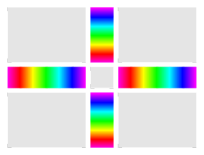

In [ ]:
#First Figure
import pivotpy.s_plots as sp 
axs=init_figure(figsize=(3.4,2.6),ncols=3,widths=[3.4,1,3.4],nrows=3,heights=[2.6,1,2.6],wspace=0.076,hspace=0.1)
[[sp.modify_axes(ax=a,xticks=[0],yticks=[0]) for a in ax] for ax in axs]
[sp.add_colorbar(ax=ax,ticks=[]) for ax in [axs[1,0],axs[1,2]]];
[sp.add_colorbar(ax=ax,vertical=True,ticks=[]) for ax in [axs[0,1],axs[2,1]]];

- **Brute Force Tweaking**
    - Here we will remove and regenerate axes based on our grid choice.

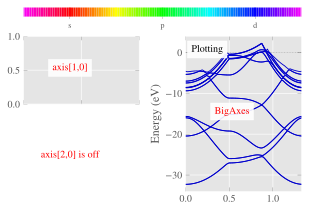

In [ ]:
#Second Figure
axs=sp.init_figure(figsize=(5,3.4),nrows=3,ncols=2,widths=[1,1],heights=[1,7,7],wspace=0.4,hspace=0.4,axes_off=[(2,0)],sharex=True,sharey=True)
import pivotpy.s_plots as sp 
import matplotlib.pyplot as plt
gs = axs[0,0].get_gridspec()
axs_to_remove=[*axs[0, :],*axs[1:, 1]]
for ax in axs_to_remove:
    ax.remove()
axlarge = plt.gcf().add_subplot(gs[0, :])
axv = plt.gcf().add_subplot(gs[1:, 1])
sp.modify_axes(ax=axv)
sp.add_colorbar(ax=axlarge)
sp.add_text(ax=axs[1,0],txts='axis[1,0]',xs=0.25,ys=0.5)
sp.add_text(ax=axs[2,0],txts='axis[2,0] is off',xs=0.15,ys=0.5)
import pivotpy.vr_parser as vp 
vr=vp.export_vasprun(path='E:/Research/graphene_example/ISPIN_1/bands/vasprun.xml')
sp.quick_bplot(path_evr=vr,ax=axv,txt='Plotting',E_Fermi=10)
sp.add_text(ax=axv,txts='BigAxes',xs=0.25,ys=0.5)

- **Mixing 2D and 3D axes in a figure**
    - A minial example below shows deleting an axes and then adding a 3D axes with same dimensions.

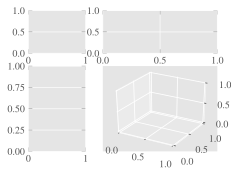

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import pivotpy as pp 
ax = pp.init_figure(nrows=2,ncols=2,widths=[1,2],heights=[1,2])
pos = ax[1,1].get_position()
ax[1,1].remove()
ax[1,1]=plt.gcf().add_axes(pos,projection='3d')

## Plotting Density of States

In [ ]:
#export
def select_pdos(tdos        = None,
                pdos_set    = None,
                ions        = [0,],
                orbs        = [0,],
                E_Fermi     = 0,
                interpolate = False,
                n           = 5,
                k           = 3,
                 ):
    """
    - Returns (interpolated/orginal) enrgy(N,), tdos(N,), and pdos(N,) of selected ions/orbitals.
    - **Parameters**
        - tdos     : `export_vasprun`().tdos or `get_tdos`().tdos. If calculations are spin-polarized, it will be `..tdos.SpinUp/SpinDown` for both. You need to apply this function twice for SpinUp and SpinDown separately.
        - pdos_set : `export_vasprun().pro_dos.pros` or `get_dos_pro_set`().pros. If calculations are spin-polarized, it will be `...pros.SpinUp/SpinDown` for both.
        - ions     : List of ions to project on, could be `range(start,stop,step)` as well, remember that `stop` is not included in python. so `range(0,2)` will generate 0 and 1 indices.
        - orbs     : List of orbitals indices to pick.
        - E_Fermi  : Here it is zero. Needs to be input.
        - interpolate: Deafult is false, if True, it will add n points between nearest points.
        - n        : int, default is 5. Adds n points between nearest kpoints.
        - k        : int, order of interpolation, defualt is 3. `n > k` should be hold.
    """
    if(tdos==[]):
        import pivotpy.g_utils as gu
        return gu.printy("Can not plot empty DOS.")
    import numpy as np
    en= tdos[:,0]-E_Fermi
    t_dos= tdos[:,1]
    pros=np.take(pdos_set[:,:,1:],list(ions),axis=0).sum(axis=0)
    p_dos=np.take(pros,orbs,axis=1).sum(axis=1)
    if(interpolate==True):
        from pivotpy import g_utils as gu
        _en,_tdos=gu.interpolate_data(en,t_dos,n=n,k=k)
        _tdos=_tdos.clip(min=0)
        _en,_pdos=gu.interpolate_data(en,p_dos,n=n,k=k)[1].clip(min=0)
    else:
        _en,_tdos,_pdos=pdos_set[0,:,0]-E_Fermi,t_dos,p_dos # reading _en from projected dos if not interpolated.

    return _en,_tdos,_pdos

In [ ]:
#export
def collect_dos(path_evr      = None,
                elim          = [],
                elements      = [[0],],
                orbs          = [[0],],
                labels        = ['s',],
                E_Fermi       = None,
                spin          = 'both',
                interpolate   = False,
                n             = 5,
                k             = 3
    ):
    """
    - Returns lists of energy,tdos, pdos and labels. If given,elements,orbs and labels must have same length. If not given, zeroth ions is collected with s-orbital.
    - **Parameters**)
        - path_evr   : Path/to/vasprun.xml or output of `export_vasprun`. Auto picks in CWD.
        - elim       : [min,max] of energy range.
        - E_Fermi    : If not given, automatically picked from `export_vasprun`.
        - elements   : List [[0],], by defualt and plot first ion's projections.
        - orbs       : List [[0],] lists of indices of orbitals, could be empty.
        - labels     : List [str,] of orbitals labels. len(labels)==len(orbs) must hold.  Auto adds `↑`,`↓` for ISPIN=2.
        - spin       : Plot spin-polarized for spin {'up','down','both'}. Default is both.
        - interpolate: Default is False, if True, bands are interpolated.
        - n          : int, number of points, default is 5.
        - k          : int, order of interpolation 0,1,2,3. Defualt 3. `n > k` should be hold.
    - **Returns**
        - Energy : (N,1) size.
        - tdos   : (N,1) size or [(N,1),(N,1)] if spin polarized.
        - pdos   : [(N,1),(N,1),...], spin polarized is auto-fixed.
        - labels : ['label1,'label2',...] spin polarized is auto-fixed.
        - vr     : Exported vasprun.
    """
    import numpy as np
    import pivotpy.vr_parser as vp
    import pivotpy.s_plots as sp
    #checking type of given path.
    if(path_evr==None):
        vr=vp.export_vasprun(path=path_evr,elim=elim)
    if(path_evr!=None):
        from os import path as pt
        if(type(path_evr)==vp.Dict2Data):
            vr=path_evr
        elif(pt.isfile(path_evr)):
            vr=vp.export_vasprun(path=path_evr,elim=elim)
        else:
            return print("path_evr = `{}` does not exist".format(path_evr))
    # Apply a robust final check.
    try:
        vr.tdos;vr.pro_dos
    except:
        return print("Object: \n{} \nis like a lower tree of export_vasprun(). Expects top tree.".format(vr))
    else:
        # Main working here.
        if(vr.pro_dos==None):
            import pivotpy.g_utils as gu
            return gu.printy("Can not plot an empty DOS object.")
        if not spin in ('up','down','both'):
            raise ValueError(
                "spin can take `up`,`down` or `both` values only.")
            return
        orbs=[[item] if type(item)==int else item for item in orbs] #Fix if integer given.
        elements=[[item] if type(item)==int else item for item in elements] #Fix if integer given.
        elem_inds = vr.sys_info.ElemIndex
        max_ind   = elem_inds[-1]-1 # Last index is used for range in ElemIndex, not python index.
        for i,elem in enumerate(elements.copy()):
            if(type(elem)==int):
                if(elem <= max_ind):
                    elements[i]=range(i,i+1)
                else:
                    return print("index {} is out of bound for ions of length {}".format(i,max_ind))
        if(E_Fermi==None):
            E_Fermi=vr.tdos.E_Fermi

        nfields = len(vr.pro_dos.labels) - 1 #
        # First fix orbitals
        if len(elements)!=len(orbs) or len(elements)!=len(labels):
            raise ValueError("elements, orbs and labels expect same length even if their entries are empty.")
            return

        # After All Fixing
        ISPIN=vr.sys_info.ISPIN
        e,ts,ps,ls=None,None,[],[] # to collect all total/projected dos.
        for elem,orb,label in zip(elements,orbs,labels):
            args_dict=dict(ions=elem,orbs=orb,interpolate=interpolate,n=n,k=k,E_Fermi=E_Fermi)
            if ISPIN==1:
                tdos=vr.tdos.tdos
                pdos_set=vr.pro_dos.pros
                e,t,p=sp.select_pdos(tdos=tdos,pdos_set=pdos_set, **args_dict)
                ps.append(p)
                ls.append(label)
                ts = t
            if ISPIN==2:
                tdos1=vr.tdos.tdos.SpinUp
                tdos2=vr.tdos.tdos.SpinDown
                pdos_set1=vr.pro_dos.pros.SpinUp
                pdos_set2=vr.pro_dos.pros.SpinDown
                if spin=='up':
                    e,t1,p1=sp.select_pdos(tdos=tdos1,pdos_set=pdos_set1, **args_dict)
                    ps.append(p1)
                    ls.append((label+'$^↑$' if label else ''))
                    ts = t1
                if spin=='down':
                    e,t2,p2=sp.select_pdos(tdos=tdos2,pdos_set=pdos_set2, **args_dict)
                    ps.append(p2)
                    ls.append((label+'$^↓$' if label else ''))
                    ts = t2
                if spin=='both':
                    e,t1,p1=sp.select_pdos(tdos=tdos1,pdos_set=pdos_set1, **args_dict)
                    ps.append(p1)
                    ls.append((label+'$^↑$' if label else ''))
                    e,t2,p2=sp.select_pdos(tdos=tdos2,pdos_set=pdos_set2, **args_dict)
                    ps.append(-p2)
                    ls.append((label+'$^↓$' if label else ''))
                    ts=[t1,-t2]
        return e,ts,ps,ls,vr

- Providing labels while using `collect_dos` is important, it will automatically return spin up/down saymbols.

In [ ]:
#export
def quick_dos_lines(path_evr      = None,
                    ax            = None,
                    elim          = [],
                    include_dos   = 'both',
                    elements      = [[0],],
                    orbs          = [[0],],
                    labels        = ['s',],
                    color_map     = 'gist_rainbow',
                    tdos_color    = (0.8,0.95,0.8),
                    linewidth     = 0.5,
                    fill_area     = True,
                    vertical      = False,
                    E_Fermi       = None,
                    figsize       = (3.4,2.6),
                    txt           = None,
                    xytxt         = [0.05,0.85],
                    ctxt          = 'black',
                    spin          = 'both',
                    interpolate   = False,
                    n             = 5,
                    k             = 3,
                    showlegend    = True,
                    legend_kwargs = {'ncol'         : 4,
                                   'anchor'         : (0,1),
                                   'handletextpad'  : 0.5,
                                   'handlelength'   : 1,
                                   'fontsize'       : 'small',
                                   'frameon'        : True
                                   }

                    ):
        """
        - Returns ax object (if ax!=False) and plot on which all matplotlib allowed actions could be performed, returns lists of energy,tdos and pdos and labels. If given,elements,orbs colors, and labels must have same length. If not given, zeroth ions is plotted with s-orbital.
        - **Parameters**)
            - path_evr   : Path/to/vasprun.xml or output of `export_vasprun`. Auto picks in CWD.
            - ax         : Matplotlib axes object, if None, one is created. If False, data lists are returned.
            - include_dos: One of {'both','tdos','pdos'}.
            - elim       : [min,max] of energy range.
            - E_Fermi    : If not given, automatically picked from `export_vasprun`.
            - elements   : List [[0],], by defualt and plot first ion's projections.
            - orbs       : List [[0],] lists of indices of orbitals, could be empty.
            - labels     : List [str,] of orbitals labels. len(labels)==len(orbs) must hold.  Auto adds `↑`,`↓` for ISPIN=2.
            - color_map  : Matplotlib's standard color maps. Default is 'gist_ranibow'. Use 'RGB' if want to compare with `quick_rgb_lines` with 3 projection inputs (len(orbs)==3).
            - fill_area  : Default is True and plots filled area for dos. If False, plots lines only.
            - vertical   : False, If True, plots along y-axis.
            - showlegend : True by defualt.
            - figsize    : Tuple (width,height) in inches. Default (3.4.2.6) is article column's width.
            - txt        : Text on figure, if None, SYSTEM's name is printed.
            - xytxt      : [x_coord,y_coord] of text relative to axes.
            - ctxt       : color of text.
            - spin       : Plot spin-polarized for spin {'up','down','both'}. Default is both.
            - interpolate: Default is False, if True, bands are interpolated.
            - n          : int, number of points, default is 5.
            - k          : int, order of interpolation 0,1,2,3. Defualt 3. `n > k` should be hold.
            - legend_kwargs: Dictionary to contain legend arguments to fix.
        - **Returns**
            - ax         : Matplotlib axes.
        """
        if(include_dos not in ('both','pdos','tdos')):
            return print("`include_dos` expects one of ['both','pdos','tdos'], got {}.".format(include_dos))
        import pivotpy.s_plots as sp
        import numpy as np, pivotpy as pp 
        import pivotpy.g_utils as gu
        import matplotlib as mpl
        import matplotlib.pyplot as plt
        
        en,tdos,pdos,vr=None,None,None,None # Placeholders for defining. must be here.
        cl_dos=collect_dos(path_evr=path_evr,
                            elim=elim,
                            elements=elements,
                            orbs=orbs,
                            labels=labels,
                            E_Fermi=E_Fermi,
                            spin=spin,
                            interpolate=interpolate,
                            n=n,
                            k=k)
        try:
            en,tdos,pdos,labels,vr=cl_dos # Labels updated
        except TypeError:
            import pivotpy.g_utils as gu
            return gu.printg("Try with large energy range.")
        # Fix elements and colors length
        if color_map in plt.colormaps():
            from matplotlib.pyplot import cm
            if len(tdos) == 2:
                c_map   = cm.get_cmap(color_map)
                c_vals  = np.linspace(0,1,2*len(orbs))
                colors  = c_map(c_vals)
            else:
                c_map   = cm.get_cmap(color_map)
                c_vals  = np.linspace(0,1,len(orbs))
                colors  = c_map(c_vals)
            # Fix for RGB comparison
            if len(tdos) == 2 and 'both' in spin and len(orbs)==3:
                colors[[-1,-2]]= colors[[-2,-1]] #Flip last two colors only
        else:
            return print("`color_map` expects one of the follwoing:\n{}".format(plt.colormaps()))

        # Make additional colors for spin down. Inverted colors are better.
        t_color=mpl.colors.to_rgb(tdos_color)
        it_color=gu.invert_color(color=t_color)
        if(ax==None):
            ax=sp.init_figure(figsize=figsize)
        if(vertical==False):
            if(fill_area==False):
                if(include_dos!='pdos'):
                    if(len(tdos)==2):   # Spin polarized.
                        ax.plot(en,tdos[0],color=(t_color),label=r'TDOS$^↑$',lw=linewidth)
                        ax.plot(en,tdos[1],color=(it_color),label=r'TDOS$^↓$',lw=linewidth)
                    else:   # unpolarized.
                        ax.plot(en,tdos,color=(t_color),label='TDOS',lw=linewidth)
                if(include_dos!='tdos'):
                    for p,l,c in zip(pdos,labels,colors):
                        ax.plot(en,p, color=(c),linewidth=linewidth,label=l)
            if(fill_area==True):
                if(include_dos!='pdos'):
                    if(len(tdos)==2):   # Spin polarized.
                        ax.fill_between(en,tdos[0],color=(t_color),label=r'TDOS$^↑$',lw=0)
                        ax.fill_between(en,tdos[1],color=(it_color),label=r'TDOS$^↓$',lw=0)
                    else:   # unpolarized.
                        ax.fill_between(en,tdos,color=(t_color),label='TDOS',lw=0)
                if(include_dos!='tdos'):
                    for p,l,c in zip(pdos,labels,colors):
                        ax.fill_between(en,p,color=(mpl.colors.to_rgba(c,0.4)),linewidth=0)
                        ax.plot(en,p, color=(c),linewidth=linewidth,label=l)
            if elim:
                ax.set_xlim([min(elim),max(elim)])
        if(vertical==True):
            if(fill_area==False):
                if(include_dos!='pdos'):
                    if(len(tdos)==2):   # Spin polarized.
                        ax.plot(tdos[0],en,color=(t_color),label=r'TDOS$^↑$',lw=linewidth)
                        ax.plot(tdos[1],en,color=(it_color),label=r'TDOS$^↓$',lw=linewidth)
                    else:   # unpolarized.
                        ax.plot(tdos,en,color=(t_color),label='TDOS',lw=linewidth)
                if(include_dos!='tdos'):
                    for p,l,c in zip(pdos,labels,colors):
                        ax.plot(p,en, color=(c),linewidth=linewidth,label=l)
            if(fill_area==True):
                if(include_dos!='pdos'):
                    if(len(tdos)==2):   # Spin polarized.
                        ax.fill_betweenx(en,tdos[0],color=(t_color),label=r'TDOS$^↑$',lw=0)
                        ax.fill_betweenx(en,tdos[1],color=(it_color),label=r'TDOS$^↓$',lw=0)
                    else:   # unpolarized.
                        ax.fill_betweenx(en,tdos,color=(t_color),label='TDOS',lw=0)
                if(include_dos!='tdos'):
                    for p,l,c in zip(pdos,labels,colors):
                        ax.fill_betweenx(en,p,color=(mpl.colors.to_rgba(c,0.4)),linewidth=0)
                        ax.plot(p,en, color=(c),linewidth=linewidth,label=l)
            if elim:
                ax.set_ylim([min(elim),max(elim)])
        if(showlegend==True):
            sp.add_legend(ax=ax,labels=[],colors=colors,widths=linewidth,**legend_kwargs)
        return ax

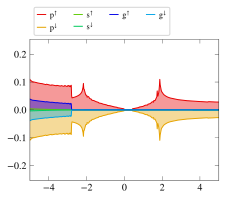

In [ ]:
quick_dos_lines(path_evr='E:/Research/graphene_example/ISPIN_2/dos/vasprun.xml',vertical=False,fill_area=True,showlegend=True,include_dos='pdos',orbs=[[1,2,3],0,1],elements=[0,0,1],linewidth=1,labels=['p','s','g'],color_map='RGB',elim=[-5,5],spin='both')

### High Display Image in Notebook
The function below `plt_to_html` is implemented for use in `pivotpy-dash` app to view and save SVG image directly from web app's interface. This also enables high display output in jupyter notebook. 

In [ ]:
#export
def plt_to_html(plt_fig=None,transparent=True,dash_html=None):
    """
    - Returns base64 encoded Image to display in notebook or HTML <svg> or plotly's dash_html_components.Img object.
    - **Parameters**
        - plt_fig    : Matplotlib's figure instance, auto picks as well.
        - transparent: True of False for fig background. 
        - dash_html  : Default is None which results in an image display in jupyter notebook.
            - If True, returns html.Img object for plotly's dash.
            - If False, returns <svg> object to embed in HTML DOM.
    """
    from io import BytesIO
    import matplotlib.pyplot as plt
    if plt_fig==None:
        plt_fig = plt.gcf()
    plot_bytes = BytesIO()
    plt.savefig(plot_bytes,format='svg',transparent=transparent)
    if dash_html == None:
        try:
            shell = get_ipython().__class__.__name__
            if shell == 'ZMQInteractiveShell' or shell=='Shell': #Shell for Colab. Don't know why Google ...
                from IPython.display import HTML # HTML
                _ = plt.clf() # Clear other display
                return HTML('<svg' + plot_bytes.getvalue().decode('utf-8').split('<svg')[1])
        except:
            return plt.show()
    elif dash_html==False:
        _ = plt.clf() # Clear image
        return '<svg' + plot_bytes.getvalue().decode('utf-8').split('<svg')[1]
    else:
        import base64
        _ = plt.clf() # Clear image
        import dash_html_components as html
        img = base64.b64encode(plot_bytes.getvalue())
        return html.Img(src="data:image/svg+xml;base64,{}".format(img.decode('utf-8')))

In [ ]:
import pivotpy as pp 
import matplotlib.pyplot as plt
pp.quick_bplot("E:/Research/graphene_example/ISPIN_1/bands/vasprun.xml",elim=[-9,9]);
fig = plt_to_html(dash_html=None,transparent=False)
fig

In [ ]:
from IPython.display import Markdown 
pp.quick_bplot("E:/Research/graphene_example/ISPIN_1/bands/vasprun.xml",elim=[-9,9]);
Markdown(plt_to_html(dash_html=False,transparent=True))

<svg height="187.2pt" version="1.1" viewBox="0 0 244.8 187.2" width="244.8pt" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs>
  <style type="text/css">
*{stroke-linecap:butt;stroke-linejoin:round;}
  </style>
 </defs>
 <g id="figure_1">
  <g id="patch_1">
   <path d="M 0 187.2 
L 244.8 187.2 
L 244.8 0 
L 0 0 
z
" style="fill:none;"/>
  </g>
  <g id="axes_1">
   <g id="patch_2">
    <path d="M 30.6 163.8 
L 220.32 163.8 
L 220.32 22.464 
L 30.6 22.464 
z
" style="fill:none;"/>
   </g>
   <g id="matplotlib.axis_1">
    <g id="xtick_1">
     <g id="line2d_1">
      <defs>
       <path d="M 0 0 
L 0 -4 
" id="m53a831e680" style="stroke:#000000;stroke-width:0.3;"/>
      </defs>
      <g>
       <use style="stroke:#000000;stroke-width:0.3;" x="30.6" xlink:href="#m53a831e680" y="163.8"/>
      </g>
     </g>
     <g id="line2d_2">
      <defs>
       <path d="M 0 0 
L 0 4 
" id="m6bd0e49528" style="stroke:#000000;stroke-width:0.3;"/>
      </defs>
      <g>
       <use style="stroke:#000000;stroke-width:0.3;" x="30.6" xlink:href="#m6bd0e49528" y="22.464"/>
      </g>
     </g>
     <g id="text_1">
      <!-- 0.00 -->
      <defs>
       <path d="M 47.59375 33 
Q 47.59375 26.296875 46.296875 20.34375 
Q 45 14.40625 42.453125 9.40625 
Q 39.90625 4.40625 35.40625 1.5 
Q 30.90625 -1.40625 25 -1.40625 
Q 18.90625 -1.40625 14.296875 1.6875 
Q 9.703125 4.796875 7.203125 10 
Q 4.703125 15.203125 3.546875 21.09375 
Q 2.40625 27 2.40625 33.59375 
Q 2.40625 42.90625 4.703125 50.34375 
Q 7 57.796875 12.34375 62.6875 
Q 17.703125 67.59375 25.40625 67.59375 
Q 35.203125 67.59375 41.390625 58 
Q 47.59375 48.40625 47.59375 33 
z
M 38 32.5 
Q 38 48.296875 34.640625 56.640625 
Q 31.296875 65 24.796875 65 
Q 18.59375 65 15.296875 56.59375 
Q 12 48.203125 12 32.90625 
Q 12 17.5 15.296875 9.34375 
Q 18.59375 1.203125 25 1.203125 
Q 31.296875 1.203125 34.640625 9.34375 
Q 38 17.5 38 32.5 
z
" id="STIXGeneral-Regular-48"/>
       <path d="M 18.09375 4.296875 
Q 18.09375 2.09375 16.4375 0.5 
Q 14.796875 -1.09375 12.5 -1.09375 
Q 10.203125 -1.09375 8.59375 0.5 
Q 7 2.09375 7 4.390625 
Q 7 6.703125 8.640625 8.34375 
Q 10.296875 10 12.59375 10 
Q 14.796875 10 16.4375 8.296875 
Q 18.09375 6.59375 18.09375 4.296875 
z
" id="STIXGeneral-Regular-46"/>
      </defs>
      <g transform="translate(21.85 174.129688)scale(0.1 -0.1)">
       <use xlink:href="#STIXGeneral-Regular-48"/>
       <use x="49.999985" xlink:href="#STIXGeneral-Regular-46"/>
       <use x="74.999969" xlink:href="#STIXGeneral-Regular-48"/>
       <use x="124.999954" xlink:href="#STIXGeneral-Regular-48"/>
      </g>
     </g>
    </g>
    <g id="xtick_2">
     <g id="line2d_3">
      <g>
       <use style="stroke:#000000;stroke-width:0.3;" x="66.312672" xlink:href="#m53a831e680" y="163.8"/>
      </g>
     </g>
     <g id="line2d_4">
      <g>
       <use style="stroke:#000000;stroke-width:0.3;" x="66.312672" xlink:href="#m6bd0e49528" y="22.464"/>
      </g>
     </g>
     <g id="text_2">
      <!-- 0.25 -->
      <defs>
       <path d="M 47.40625 13.703125 
L 42 0 
L 2.90625 0 
L 2.90625 1.203125 
L 20.703125 20.09375 
Q 27.703125 27.40625 30.703125 33.5 
Q 33.703125 39.59375 33.703125 46.09375 
Q 33.703125 52.796875 30 56.5 
Q 26.296875 60.203125 19.796875 60.203125 
Q 14.40625 60.203125 11.25 57.390625 
Q 8.09375 54.59375 5.09375 47.203125 
L 3 47.703125 
Q 4.703125 57 9.84375 62.296875 
Q 15 67.59375 23.796875 67.59375 
Q 32.09375 67.59375 37.1875 62.59375 
Q 42.296875 57.59375 42.296875 50 
Q 42.296875 38.703125 29.5 25.203125 
L 13 7.59375 
L 36.40625 7.59375 
Q 39.703125 7.59375 41.640625 8.890625 
Q 43.59375 10.203125 46 14.296875 
z
" id="STIXGeneral-Regular-50"/>
       <path d="M 43.796875 68.09375 
L 40.203125 59.59375 
Q 39.59375 58.296875 37.5 58.296875 
L 18.09375 58.296875 
L 14.09375 49.796875 
Q 25.09375 47.703125 30 45.25 
Q 34.90625 42.796875 39.09375 37 
Q 42.59375 32.203125 42.59375 24.296875 
Q 42.59375 17.09375 40.25 12.1875 
Q 37.90625 7.296875 32.796875 3.5 
Q 26 -1.40625 15.796875 -1.40625 
Q 10.09375 -1.40625 6.59375 0.296875 
Q 3.09375 2 3.09375 4.796875 
Q 3.09375 8.59375 7.59375 8.59375 
Q 11.203125 8.59375 15 5.5 
Q 18.90625 2.296875 22.09375 2.296875 
Q 27.296875 2.296875 31.4375 7.5 
Q 35.59375 12.703125 35.59375 19.203125 
Q 35.59375 28.796875 28.90625 34.203125 
Q 20.203125 41.203125 7.59375 41.203125 
Q 6.40625 41.203125 6.40625 42 
L 6.5 42.5 
L 17.40625 66.203125 
L 38.09375 66.203125 
Q 39.796875 66.203125 40.75 66.703125 
Q 41.703125 67.203125 42.90625 68.796875 
z
" id="STIXGeneral-Regular-53"/>
      </defs>
      <g transform="translate(57.562672 174.129688)scale(0.1 -0.1)">
       <use xlink:href="#STIXGeneral-Regular-48"/>
       <use x="49.999985" xlink:href="#STIXGeneral-Regular-46"/>
       <use x="74.999969" xlink:href="#STIXGeneral-Regular-50"/>
       <use x="124.999954" xlink:href="#STIXGeneral-Regular-53"/>
      </g>
     </g>
    </g>
    <g id="xtick_3">
     <g id="line2d_5">
      <g>
       <use style="stroke:#000000;stroke-width:0.3;" x="102.025344" xlink:href="#m53a831e680" y="163.8"/>
      </g>
     </g>
     <g id="line2d_6">
      <g>
       <use style="stroke:#000000;stroke-width:0.3;" x="102.025344" xlink:href="#m6bd0e49528" y="22.464"/>
      </g>
     </g>
     <g id="text_3">
      <!-- 0.50 -->
      <g transform="translate(93.275344 174.129688)scale(0.1 -0.1)">
       <use xlink:href="#STIXGeneral-Regular-48"/>
       <use x="49.999985" xlink:href="#STIXGeneral-Regular-46"/>
       <use x="74.999969" xlink:href="#STIXGeneral-Regular-53"/>
       <use x="124.999954" xlink:href="#STIXGeneral-Regular-48"/>
      </g>
     </g>
    </g>
    <g id="xtick_4">
     <g id="line2d_7">
      <g>
       <use style="stroke:#000000;stroke-width:0.3;" x="137.738017" xlink:href="#m53a831e680" y="163.8"/>
      </g>
     </g>
     <g id="line2d_8">
      <g>
       <use style="stroke:#000000;stroke-width:0.3;" x="137.738017" xlink:href="#m6bd0e49528" y="22.464"/>
      </g>
     </g>
     <g id="text_4">
      <!-- 0.75 -->
      <defs>
       <path d="M 44.90625 64.59375 
L 23.703125 -0.796875 
L 17.203125 -0.796875 
L 37 58.796875 
L 15.5 58.796875 
Q 11.203125 58.796875 9.09375 57.296875 
Q 7 55.796875 3.796875 50.59375 
L 2 51.5 
L 8 66.203125 
L 44.90625 66.203125 
z
" id="STIXGeneral-Regular-55"/>
      </defs>
      <g transform="translate(128.988017 174.129688)scale(0.1 -0.1)">
       <use xlink:href="#STIXGeneral-Regular-48"/>
       <use x="49.999985" xlink:href="#STIXGeneral-Regular-46"/>
       <use x="74.999969" xlink:href="#STIXGeneral-Regular-55"/>
       <use x="124.999954" xlink:href="#STIXGeneral-Regular-53"/>
      </g>
     </g>
    </g>
    <g id="xtick_5">
     <g id="line2d_9">
      <g>
       <use style="stroke:#000000;stroke-width:0.3;" x="173.450689" xlink:href="#m53a831e680" y="163.8"/>
      </g>
     </g>
     <g id="line2d_10">
      <g>
       <use style="stroke:#000000;stroke-width:0.3;" x="173.450689" xlink:href="#m6bd0e49528" y="22.464"/>
      </g>
     </g>
     <g id="text_5">
      <!-- 1.00 -->
      <defs>
       <path d="M 39.40625 0 
L 11.796875 0 
L 11.796875 1.5 
Q 17.296875 1.796875 19.296875 3.546875 
Q 21.296875 5.296875 21.296875 9.5 
L 21.296875 54.40625 
Q 21.296875 59.296875 18.296875 59.296875 
Q 16.90625 59.296875 13.796875 58.09375 
L 11.09375 57.09375 
L 11.09375 58.5 
L 29 67.59375 
L 29.90625 67.296875 
L 29.90625 7.59375 
Q 29.90625 4.296875 31.90625 2.890625 
Q 33.90625 1.5 39.40625 1.5 
z
" id="STIXGeneral-Regular-49"/>
      </defs>
      <g transform="translate(164.700689 174.129688)scale(0.1 -0.1)">
       <use xlink:href="#STIXGeneral-Regular-49"/>
       <use x="49.999985" xlink:href="#STIXGeneral-Regular-46"/>
       <use x="74.999969" xlink:href="#STIXGeneral-Regular-48"/>
       <use x="124.999954" xlink:href="#STIXGeneral-Regular-48"/>
      </g>
     </g>
    </g>
    <g id="xtick_6">
     <g id="line2d_11">
      <g>
       <use style="stroke:#000000;stroke-width:0.3;" x="209.163361" xlink:href="#m53a831e680" y="163.8"/>
      </g>
     </g>
     <g id="line2d_12">
      <g>
       <use style="stroke:#000000;stroke-width:0.3;" x="209.163361" xlink:href="#m6bd0e49528" y="22.464"/>
      </g>
     </g>
     <g id="text_6">
      <!-- 1.25 -->
      <g transform="translate(200.413361 174.129688)scale(0.1 -0.1)">
       <use xlink:href="#STIXGeneral-Regular-49"/>
       <use x="49.999985" xlink:href="#STIXGeneral-Regular-46"/>
       <use x="74.999969" xlink:href="#STIXGeneral-Regular-50"/>
       <use x="124.999954" xlink:href="#STIXGeneral-Regular-53"/>
      </g>
     </g>
    </g>
   </g>
   <g id="matplotlib.axis_2">
    <g id="ytick_1">
     <g id="line2d_13">
      <defs>
       <path d="M 0 0 
L 4 0 
" id="mf59dcdae6e" style="stroke:#000000;stroke-width:0.3;"/>
      </defs>
      <g>
       <use style="stroke:#000000;stroke-width:0.3;" x="30.6" xlink:href="#mf59dcdae6e" y="132.392"/>
      </g>
     </g>
     <g id="line2d_14">
      <defs>
       <path d="M 0 0 
L -4 0 
" id="m83fe246b4d" style="stroke:#000000;stroke-width:0.3;"/>
      </defs>
      <g>
       <use style="stroke:#000000;stroke-width:0.3;" x="220.32" xlink:href="#m83fe246b4d" y="132.392"/>
      </g>
     </g>
     <g id="text_7">
      <!-- −5 -->
      <defs>
       <path d="M 62.09375 22 
L 6.40625 22 
L 6.40625 28.59375 
L 62.09375 28.59375 
z
" id="STIXGeneral-Regular-8722"/>
      </defs>
      <g transform="translate(15.25 135.806844)scale(0.1 -0.1)">
       <use xlink:href="#STIXGeneral-Regular-8722"/>
       <use x="68.499985" xlink:href="#STIXGeneral-Regular-53"/>
      </g>
     </g>
    </g>
    <g id="ytick_2">
     <g id="line2d_15">
      <g>
       <use style="stroke:#000000;stroke-width:0.3;" x="30.6" xlink:href="#mf59dcdae6e" y="93.132"/>
      </g>
     </g>
     <g id="line2d_16">
      <g>
       <use style="stroke:#000000;stroke-width:0.3;" x="220.32" xlink:href="#m83fe246b4d" y="93.132"/>
      </g>
     </g>
     <g id="text_8">
      <!-- 0 -->
      <g transform="translate(22.1 96.546844)scale(0.1 -0.1)">
       <use xlink:href="#STIXGeneral-Regular-48"/>
      </g>
     </g>
    </g>
    <g id="ytick_3">
     <g id="line2d_17">
      <g>
       <use style="stroke:#000000;stroke-width:0.3;" x="30.6" xlink:href="#mf59dcdae6e" y="53.872"/>
      </g>
     </g>
     <g id="line2d_18">
      <g>
       <use style="stroke:#000000;stroke-width:0.3;" x="220.32" xlink:href="#m83fe246b4d" y="53.872"/>
      </g>
     </g>
     <g id="text_9">
      <!-- 5 -->
      <g transform="translate(22.1 57.286844)scale(0.1 -0.1)">
       <use xlink:href="#STIXGeneral-Regular-53"/>
      </g>
     </g>
    </g>
    <g id="text_10">
     <!-- Energy (eV) -->
     <defs>
      <path d="M 59.703125 16.90625 
L 55.09375 0 
L 1.203125 0 
L 1.203125 1.90625 
Q 6.90625 2.296875 8.40625 3.9375 
Q 9.90625 5.59375 9.90625 11.40625 
L 9.90625 55 
Q 9.90625 60.59375 8.34375 62.296875 
Q 6.796875 64 1.203125 64.296875 
L 1.203125 66.203125 
L 54.203125 66.203125 
L 54.59375 51.90625 
L 52.09375 51.90625 
Q 51 58.59375 48.203125 60.5 
Q 45.40625 62.40625 36.703125 62.40625 
L 23.59375 62.40625 
Q 21.40625 62.40625 20.75 61.75 
Q 20.09375 61.09375 20.09375 58.796875 
L 20.09375 36.796875 
L 35.203125 36.796875 
Q 41.5 36.796875 43.546875 38.59375 
Q 45.59375 40.40625 46.5 46.40625 
L 48.796875 46.40625 
L 48.796875 23 
L 46.5 23 
Q 45.59375 29.296875 43.59375 31 
Q 41.59375 32.703125 35.203125 32.703125 
L 20.09375 32.703125 
L 20.09375 8.40625 
Q 20.09375 5.40625 22.1875 4.546875 
Q 24.296875 3.703125 30.203125 3.703125 
L 33.796875 3.703125 
Q 44.5 3.703125 49 6.296875 
Q 53.5 8.90625 56.90625 16.90625 
z
" id="STIXGeneral-Regular-69"/>
      <path d="M 48.5 0 
L 27.703125 0 
L 27.796875 1.5 
Q 31.5 1.796875 32.75 3.640625 
Q 34 5.5 34 10.5 
L 34 30.40625 
Q 34 40.5 26.703125 40.5 
Q 24.203125 40.5 22 39.296875 
Q 19.796875 38.09375 16.40625 34.796875 
L 16.40625 7.203125 
Q 16.40625 4.203125 17.75 3 
Q 19.09375 1.796875 22.90625 1.5 
L 22.90625 0 
L 1.796875 0 
L 1.796875 1.5 
Q 5.59375 1.796875 6.796875 3.34375 
Q 8 4.90625 8 9.40625 
L 8 33.703125 
Q 8 37.40625 7.296875 38.796875 
Q 6.59375 40.203125 4.5 40.203125 
Q 2.5 40.203125 1.59375 39.796875 
L 1.59375 41.5 
Q 8.59375 43.5 15.296875 46 
L 16.09375 45.703125 
L 16.09375 37.90625 
L 16.203125 37.90625 
Q 23.296875 46 30.59375 46 
Q 36.296875 46 39.34375 42 
Q 42.40625 38 42.40625 30.59375 
L 42.40625 8.5 
Q 42.40625 4.5 43.59375 3.203125 
Q 44.796875 1.90625 48.5 1.5 
z
" id="STIXGeneral-Regular-110"/>
      <path d="M 40.796875 16.40625 
L 42.40625 15.703125 
Q 36.40625 -1 21.5 -1 
Q 12.703125 -1 7.59375 5.140625 
Q 2.5 11.296875 2.5 21.703125 
Q 2.5 32.40625 8.203125 39.203125 
Q 13.90625 46 23.203125 46 
Q 32.203125 46 37.09375 39.09375 
Q 40 35.09375 40.5 27.703125 
L 9.703125 27.703125 
Q 10.09375 21.40625 10.9375 18.09375 
Q 11.796875 14.796875 14.296875 11.40625 
Q 18.5 5.90625 25.40625 5.90625 
Q 30.296875 5.90625 33.640625 8.296875 
Q 37 10.703125 40.796875 16.40625 
z
M 9.90625 30.90625 
L 30.296875 30.90625 
Q 29.40625 37.203125 27.34375 39.796875 
Q 25.296875 42.40625 20.5 42.40625 
Q 16.296875 42.40625 13.5 39.453125 
Q 10.703125 36.5 9.90625 30.90625 
z
" id="STIXGeneral-Regular-101"/>
      <path d="M 16 45.796875 
L 16 36.59375 
Q 19.796875 42 22.34375 44 
Q 24.90625 46 28 46 
Q 30.59375 46 32.046875 44.59375 
Q 33.5 43.203125 33.5 40.703125 
Q 33.5 38.59375 32.453125 37.390625 
Q 31.40625 36.203125 29.59375 36.203125 
Q 27.703125 36.203125 25.59375 38.203125 
Q 24 39.703125 23 39.703125 
Q 20.90625 39.703125 18.453125 36.796875 
Q 16 33.90625 16 31.5 
L 16 9 
Q 16 4.703125 17.703125 3.203125 
Q 19.40625 1.703125 24.5 1.5 
L 24.5 0 
L 0.5 0 
L 0.5 1.5 
Q 5.296875 2.40625 6.4375 3.5 
Q 7.59375 4.59375 7.59375 8.40625 
L 7.59375 33.40625 
Q 7.59375 36.703125 6.84375 38.046875 
Q 6.09375 39.40625 4.203125 39.40625 
Q 2.59375 39.40625 0.703125 39 
L 0.703125 40.59375 
Q 7 42.59375 15.5 46 
z
" id="STIXGeneral-Regular-114"/>
      <path d="M 47 38.796875 
L 38.703125 38.796875 
Q 40.59375 34.5 40.59375 30.40625 
Q 40.59375 22.703125 35.390625 18.796875 
Q 30.203125 14.90625 25 14.90625 
Q 23.90625 14.90625 21.203125 15.203125 
L 19.296875 15.40625 
Q 17.296875 14.796875 15.296875 12.6875 
Q 13.296875 10.59375 13.296875 9.09375 
Q 13.296875 6.796875 21.09375 6.40625 
L 34 5.796875 
Q 39.5 5.59375 42.796875 2.6875 
Q 46.09375 -0.203125 46.09375 -4.90625 
Q 46.09375 -10.703125 40.09375 -15.40625 
Q 31.796875 -21.796875 20.09375 -21.796875 
Q 12.90625 -21.796875 7.84375 -18.9375 
Q 2.796875 -16.09375 2.796875 -12.09375 
Q 2.796875 -9.296875 5 -6.546875 
Q 7.203125 -3.796875 12.59375 0.09375 
Q 9.40625 1.59375 8.34375 2.6875 
Q 7.296875 3.796875 7.296875 5.40625 
Q 7.296875 8.296875 11.90625 12.296875 
Q 14.203125 14.296875 16.203125 16.296875 
Q 11.203125 18.796875 9.046875 21.890625 
Q 6.90625 25 6.90625 29.703125 
Q 6.90625 36.5 11.75 41.25 
Q 16.59375 46 23.59375 46 
Q 27.59375 46 31.59375 44.5 
L 33.796875 43.703125 
Q 36.703125 42.703125 39.296875 42.703125 
L 47 42.703125 
z
M 15.203125 33.796875 
L 15.203125 33.5 
Q 15.203125 26.296875 18.046875 21.84375 
Q 20.90625 17.40625 25.5 17.40625 
Q 28.90625 17.40625 30.90625 19.84375 
Q 32.90625 22.296875 32.90625 26.40625 
Q 32.90625 33 29.90625 38.5 
Q 27.40625 43.203125 22.59375 43.203125 
Q 19.09375 43.203125 17.140625 40.703125 
Q 15.203125 38.203125 15.203125 33.796875 
z
M 43.296875 -6.40625 
Q 43.296875 -3.59375 40.546875 -2.546875 
Q 37.796875 -1.5 30.90625 -1.5 
Q 21 -1.5 14.703125 -0.203125 
Q 11.703125 -3.796875 10.75 -5.4375 
Q 9.796875 -7.09375 9.796875 -8.796875 
Q 9.796875 -12.09375 13.75 -14.09375 
Q 17.703125 -16.09375 24.296875 -16.09375 
Q 32.796875 -16.09375 38.046875 -13.4375 
Q 43.296875 -10.796875 43.296875 -6.40625 
z
" id="STIXGeneral-Regular-103"/>
      <path d="M 47.5 45 
L 47.5 43.5 
Q 45.703125 43.296875 44.59375 42.1875 
Q 43.5 41.09375 42.5 38.40625 
L 27.5 -2.5 
Q 23.59375 -13.09375 19.640625 -17.4375 
Q 15.703125 -21.796875 10 -21.796875 
Q 6.796875 -21.796875 4.890625 -20.140625 
Q 3 -18.5 3 -16 
Q 3 -14.09375 4.25 -12.75 
Q 5.5 -11.40625 7.296875 -11.40625 
Q 10.203125 -11.40625 12.5 -12.703125 
Q 13.796875 -13.40625 15.09375 -13.40625 
Q 17.203125 -13.40625 20.09375 -9 
Q 21.5 -7 22.796875 -3.296875 
Q 24.09375 0.40625 24.09375 1.796875 
Q 24.09375 3.09375 19.90625 11.90625 
L 6.703125 40.09375 
Q 5.40625 43 1.40625 43.59375 
L 1.40625 45 
L 21.90625 45 
L 21.90625 43.5 
Q 18.703125 43.40625 17.453125 42.796875 
Q 16.203125 42.203125 16.203125 40.796875 
Q 16.203125 39.703125 17.5 36.703125 
L 28.703125 11.703125 
L 38.40625 39.296875 
Q 38.796875 40.203125 38.796875 41.09375 
Q 38.796875 43.5 34.203125 43.5 
L 34.203125 45 
z
" id="STIXGeneral-Regular-121"/>
      <path id="STIXGeneral-Regular-32"/>
      <path d="M 30.40625 -16.09375 
L 29.203125 -17.703125 
Q 17.59375 -11.09375 11.1875 0.5 
Q 4.796875 12.09375 4.796875 25.203125 
Q 4.796875 52.90625 29.5 67.59375 
L 30.40625 66 
Q 20.203125 57.296875 16.796875 48.84375 
Q 13.40625 40.40625 13.40625 25.5 
Q 13.40625 10.703125 16.90625 1.5 
Q 20.40625 -7.703125 30.40625 -16.09375 
z
" id="STIXGeneral-Regular-40"/>
      <path d="M 69.703125 66.203125 
L 69.703125 64.296875 
Q 66.59375 64.203125 64.59375 62.34375 
Q 62.59375 60.5 60.5 55.203125 
L 38.296875 -1.09375 
L 36.796875 -1.09375 
L 12.40625 53.296875 
Q 9.203125 60.40625 7.296875 62.296875 
Q 5.40625 64.203125 1.59375 64.296875 
L 1.59375 66.203125 
L 28.09375 66.203125 
L 28.09375 64.296875 
L 25.296875 64.09375 
Q 20.796875 63.796875 20.796875 61 
Q 20.796875 59 24.703125 50.296875 
L 39.90625 16.09375 
L 54.59375 53 
Q 56.5 57.796875 56.5 60.203125 
Q 56.5 60.90625 56.34375 61.453125 
Q 56.203125 62 56 62.390625 
Q 55.796875 62.796875 55.25 63.09375 
Q 54.703125 63.40625 54.390625 63.546875 
Q 54.09375 63.703125 53.296875 63.84375 
Q 52.5 64 52.140625 64.046875 
Q 51.796875 64.09375 50.75 64.1875 
Q 49.703125 64.296875 49.296875 64.296875 
L 49.296875 66.203125 
z
" id="STIXGeneral-Regular-86"/>
      <path d="M 2.90625 66 
L 4.09375 67.59375 
Q 15.5 60.796875 22 49.1875 
Q 28.5 37.59375 28.5 24.703125 
Q 28.5 -2.59375 3.796875 -17.703125 
L 2.90625 -16.09375 
Q 13.203125 -7.59375 16.546875 0.84375 
Q 19.90625 9.296875 19.90625 24.40625 
Q 19.90625 39.59375 16.546875 48.75 
Q 13.203125 57.90625 2.90625 66 
z
" id="STIXGeneral-Regular-41"/>
     </defs>
     <g transform="translate(9.070312 117.982)rotate(-90)scale(0.1 -0.1)">
      <use xlink:href="#STIXGeneral-Regular-69"/>
      <use x="61.099991" xlink:href="#STIXGeneral-Regular-110"/>
      <use x="111.099976" xlink:href="#STIXGeneral-Regular-101"/>
      <use x="155.499969" xlink:href="#STIXGeneral-Regular-114"/>
      <use x="188.799957" xlink:href="#STIXGeneral-Regular-103"/>
      <use x="238.799942" xlink:href="#STIXGeneral-Regular-121"/>
      <use x="288.799927" xlink:href="#STIXGeneral-Regular-32"/>
      <use x="313.799911" xlink:href="#STIXGeneral-Regular-40"/>
      <use x="347.099899" xlink:href="#STIXGeneral-Regular-101"/>
      <use x="391.499893" xlink:href="#STIXGeneral-Regular-86"/>
      <use x="463.699875" xlink:href="#STIXGeneral-Regular-41"/>
     </g>
    </g>
   </g>
   <g id="LineCollection_1">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 93.132 
L 220.32 93.132 
" style="fill:none;stroke:#000000;stroke-dasharray:1.11,0.48;stroke-dashoffset:0;stroke-opacity:0.6;stroke-width:0.3;"/>
   </g>
   <g id="line2d_19">
    <path clip-path="url(#pa52aac94a7)" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_20">
    <path clip-path="url(#pa52aac94a7)" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_21">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 148.86 
L 33.057032 148.794828 
L 35.514064 148.597743 
L 37.971096 148.269529 
L 40.428127 147.810972 
L 42.885159 147.222858 
L 45.342191 146.5044 
L 47.799223 145.657169 
L 50.256255 144.682736 
L 52.713287 143.581885 
L 55.170319 142.356188 
L 57.62735 141.007214 
L 60.084382 139.53732 
L 62.541414 141.391962 
L 64.998446 144.901021 
L 67.455478 148.451696 
L 69.91251 152.027496 
L 72.369541 155.611934 
L 74.826573 159.190091 
L 77.283605 162.749402 
L 79.740637 166.278091 
L 82.197669 169.765164 
L 84.654701 173.198844 
L 87.111733 176.568137 
L 89.568764 179.85734 
L 92.025796 183.044467 
L 94.482828 186.089472 
L 96.326038 188.2 
M 132.650056 188.2 
L 133.195365 188.065821 
L 135.023854 187.607264 
L 136.866628 187.145566 
L 138.695116 186.69015 
L 140.523605 186.252794 
L 142.366379 185.850772 
L 144.194868 185.506854 
L 146.037642 185.250879 
L 147.866131 185.118965 
L 149.694619 185.148803 
L 151.537393 185.357666 
L 153.365882 185.701584 
L 155.265796 186.102036 
L 155.265796 186.102036 
L 157.594262 186.040005 
L 159.922729 184.219126 
L 162.23691 182.159546 
L 164.565376 179.961772 
L 166.893842 177.639935 
L 169.208023 175.201889 
L 171.53649 172.65156 
L 173.850671 169.992087 
L 176.179137 167.228183 
L 178.507603 164.363774 
L 180.821785 161.40514 
L 183.150251 158.358564 
L 185.478717 155.230327 
L 187.792898 152.031422 
L 190.121364 148.772057 
L 192.435546 145.466365 
L 194.764012 142.130836 
L 197.092478 138.787454 
L 199.406659 140.173332 
L 201.735125 141.808904 
L 204.063592 143.279583 
L 206.377773 144.58223 
L 208.706239 145.715274 
L 211.02042 146.675573 
L 213.348886 147.463129 
L 215.677353 148.07637 
L 217.991534 148.513726 
L 220.32 148.775198 
L 220.32 148.86 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_22">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 148.856074 
L 33.057032 148.790902 
L 35.514064 148.593817 
L 37.971096 148.265603 
L 40.428127 147.807046 
L 42.885159 147.218932 
L 45.342191 146.500474 
L 47.799223 145.653243 
L 50.256255 144.67881 
L 52.713287 143.577959 
L 55.170319 142.352262 
L 57.62735 141.003288 
L 60.084382 139.533394 
L 62.541414 141.389607 
L 64.998446 144.89788 
L 67.455478 148.44934 
L 69.91251 152.025141 
L 72.369541 155.608794 
L 74.826573 159.18695 
L 77.283605 162.746262 
L 79.740637 166.275736 
L 82.197669 169.762809 
L 84.654701 173.196488 
L 87.111733 176.565782 
L 89.568764 179.854984 
L 92.025796 183.042111 
L 94.482828 186.087117 
L 96.328095 188.2 
M 132.639513 188.2 
L 133.195365 188.063465 
L 135.023854 187.604123 
L 136.866628 187.142426 
L 138.695116 186.68701 
L 140.523605 186.249653 
L 142.366379 185.848416 
L 144.194868 185.503713 
L 146.037642 185.247738 
L 147.866131 185.115824 
L 149.694619 185.145662 
L 151.537393 185.354525 
L 153.365882 185.697658 
L 155.265796 186.098895 
L 155.265796 186.098895 
L 157.594262 186.03922 
L 159.922729 184.217556 
L 162.23691 182.158761 
L 164.565376 179.960201 
L 166.893842 177.638365 
L 169.208023 175.200319 
L 171.53649 172.649989 
L 173.850671 169.990517 
L 176.179137 167.226613 
L 178.507603 164.362203 
L 180.821785 161.40357 
L 183.150251 158.356208 
L 185.478717 155.228757 
L 187.792898 152.029852 
L 190.121364 148.770487 
L 192.435546 145.464795 
L 194.764012 142.129265 
L 197.092478 138.785098 
L 199.406659 140.169406 
L 201.735125 141.804978 
L 204.063592 143.275657 
L 206.377773 144.578304 
L 208.706239 145.711348 
L 211.02042 146.671647 
L 213.348886 147.459203 
L 215.677353 148.072444 
L 217.991534 148.5098 
L 220.32 148.771272 
L 220.32 148.856074 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_23">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 113.808672 
L 33.057032 113.972778 
L 35.514064 114.472166 
L 37.971096 115.329604 
L 40.428127 116.578072 
L 42.885159 118.237985 
L 45.342191 120.288927 
L 47.799223 122.679861 
L 50.256255 125.354252 
L 52.713287 128.259492 
L 55.170319 131.350825 
L 57.62735 134.591345 
L 60.084382 137.94729 
L 62.541414 137.949646 
L 64.998446 136.247332 
L 67.455478 134.43352 
L 69.91251 132.513706 
L 72.369541 131.607585 
L 74.826573 132.76654 
L 77.283605 133.843835 
L 79.740637 134.833187 
L 82.197669 135.729885 
L 84.654701 136.530789 
L 87.111733 137.231973 
L 89.568764 137.83108 
L 92.025796 138.325756 
L 94.482828 138.713645 
L 96.93986 138.993962 
L 99.396892 139.165135 
L 102.025344 139.227951 
L 102.025344 139.227951 
L 103.853833 139.311182 
L 105.696607 139.560876 
L 107.525096 139.972321 
L 109.353585 140.54002 
L 111.196359 141.257693 
L 113.024848 142.115132 
L 114.867621 143.102913 
L 116.69611 144.20926 
L 118.524599 145.423964 
L 120.367373 146.735248 
L 122.195862 148.130549 
L 124.024351 149.598873 
L 125.867124 151.129228 
L 127.695613 152.71062 
L 129.524102 154.332058 
L 131.366876 155.983334 
L 133.195365 157.651884 
L 135.023854 159.327501 
L 136.866628 160.996836 
L 138.695116 162.644971 
L 140.523605 164.253846 
L 142.366379 165.80226 
L 144.194868 167.261947 
L 146.037642 168.596787 
L 147.866131 169.762024 
L 149.694619 170.708975 
L 151.537393 171.390528 
L 153.365882 171.780773 
L 155.265796 171.854582 
L 155.265796 171.854582 
L 157.594262 171.089012 
L 159.922729 169.700778 
L 162.23691 167.931722 
L 164.565376 165.907477 
L 166.893842 163.695568 
L 169.208023 161.335257 
L 171.53649 158.85324 
L 173.850671 156.269147 
L 176.179137 153.597896 
L 178.507603 150.855978 
L 180.821785 148.05831 
L 183.150251 145.219812 
L 185.478717 142.356188 
L 187.792898 139.484712 
L 190.121364 136.625798 
L 192.435546 134.307103 
L 194.764012 136.41772 
L 197.092478 138.374439 
L 199.406659 135.459776 
L 201.735125 132.179996 
L 204.063592 128.986588 
L 206.377773 125.926663 
L 208.706239 123.056757 
L 211.02042 120.445182 
L 213.348886 118.166532 
L 215.677353 116.300896 
L 217.991534 114.92287 
L 220.32 114.083492 
L 220.32 113.808672 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_24">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 113.804746 
L 33.057032 113.968852 
L 35.514064 114.469025 
L 37.971096 115.326463 
L 40.428127 116.576502 
L 42.885159 118.236414 
L 45.342191 120.286572 
L 47.799223 122.677506 
L 50.256255 125.351112 
L 52.713287 128.256352 
L 55.170319 131.347684 
L 57.62735 134.588204 
L 60.084382 137.944934 
L 62.541414 137.94572 
L 64.998446 136.242621 
L 67.455478 134.429594 
L 69.91251 132.50978 
L 72.369541 131.604444 
L 74.826573 132.7634 
L 77.283605 133.840694 
L 79.740637 134.830046 
L 82.197669 135.726744 
L 84.654701 136.527648 
L 87.111733 137.228832 
L 89.568764 137.82794 
L 92.025796 138.32183 
L 94.482828 138.710504 
L 96.93986 138.990036 
L 99.396892 139.161994 
L 102.025344 139.22481 
L 102.025344 139.22481 
L 103.853833 139.308042 
L 105.696607 139.55695 
L 107.525096 139.96918 
L 109.353585 140.53688 
L 111.196359 141.254552 
L 113.024848 142.111991 
L 114.867621 143.099772 
L 116.69611 144.206904 
L 118.524599 145.421609 
L 120.367373 146.732108 
L 122.195862 148.128193 
L 124.024351 149.596517 
L 125.867124 151.126872 
L 127.695613 152.708265 
L 129.524102 154.330488 
L 131.366876 155.980978 
L 133.195365 157.650314 
L 135.023854 159.32593 
L 136.866628 160.995266 
L 138.695116 162.6434 
L 140.523605 164.252275 
L 142.366379 165.80069 
L 144.194868 167.260376 
L 146.037642 168.595216 
L 147.866131 169.761238 
L 149.694619 170.707404 
L 151.537393 171.388958 
L 153.365882 171.779202 
L 155.265796 171.853011 
L 155.265796 171.853011 
L 157.594262 171.086656 
L 159.922729 169.698422 
L 162.23691 167.928582 
L 164.565376 165.904336 
L 166.893842 163.692428 
L 169.208023 161.332116 
L 171.53649 158.850099 
L 173.850671 156.265221 
L 176.179137 153.594756 
L 178.507603 150.852837 
L 180.821785 148.054384 
L 183.150251 145.215886 
L 185.478717 142.352262 
L 187.792898 139.480786 
L 190.121364 136.621087 
L 192.435546 134.303177 
L 194.764012 136.41458 
L 197.092478 138.370513 
L 199.406659 135.457421 
L 201.735125 132.17764 
L 204.063592 128.984232 
L 206.377773 125.924308 
L 208.706239 123.054402 
L 211.02042 120.442826 
L 213.348886 118.163391 
L 215.677353 116.297756 
L 217.991534 114.918944 
L 220.32 114.080351 
L 220.32 113.804746 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_25">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 111.076176 
L 33.057032 111.263053 
L 35.514064 111.807197 
L 37.971096 112.652072 
L 40.428127 113.715233 
L 42.885159 114.915804 
L 45.342191 116.204317 
L 47.799223 117.560357 
L 50.256255 118.970576 
L 52.713287 120.421626 
L 55.170319 121.896232 
L 57.62735 123.377119 
L 60.084382 124.849369 
L 62.541414 126.298063 
L 64.998446 127.708282 
L 67.455478 129.070604 
L 69.91251 130.373251 
L 72.369541 130.494957 
L 74.826573 128.383554 
L 77.283605 126.189705 
L 79.740637 123.927544 
L 82.197669 121.614345 
L 84.654701 119.273664 
L 87.111733 116.940049 
L 89.568764 114.662184 
L 92.025796 112.507595 
L 94.482828 110.576003 
L 96.93986 108.997751 
L 99.396892 107.93145 
L 102.025344 107.51922 
L 102.025344 107.51922 
L 103.853833 107.496449 
L 105.696607 107.429707 
L 107.525096 107.317423 
L 109.353585 107.161168 
L 111.196359 106.960157 
L 113.024848 106.71439 
L 114.867621 106.423866 
L 116.69611 106.088585 
L 118.524599 105.709334 
L 120.367373 105.285326 
L 122.195862 104.817346 
L 124.024351 104.304611 
L 125.867124 103.748689 
L 127.695613 103.148011 
L 129.524102 102.504147 
L 131.366876 101.817097 
L 133.195365 101.086076 
L 135.023854 100.311869 
L 136.866628 99.495261 
L 138.695116 98.635467 
L 140.523605 97.733272 
L 142.366379 96.789462 
L 144.194868 95.804036 
L 146.037642 94.776994 
L 147.866131 93.710692 
L 149.694619 92.607486 
L 151.537393 91.472087 
L 153.365882 90.329621 
L 155.265796 89.320639 
L 155.265796 89.320639 
L 157.594262 91.333107 
L 159.922729 94.15433 
L 162.23691 97.119246 
L 164.565376 100.185452 
L 166.893842 103.312118 
L 169.208023 106.463911 
L 171.53649 109.610207 
L 173.850671 112.723525 
L 176.179137 115.781094 
L 178.507603 118.763284 
L 180.821785 121.653605 
L 183.150251 124.437924 
L 185.478717 127.104463 
L 187.792898 129.6438 
L 190.121364 132.047297 
L 192.435546 133.797508 
L 194.764012 131.024182 
L 197.092478 128.32859 
L 199.406659 125.735074 
L 201.735125 123.270332 
L 204.063592 120.961844 
L 206.377773 118.835522 
L 208.706239 116.918064 
L 211.02042 115.233024 
L 213.348886 113.80239 
L 215.677353 112.646576 
L 217.991534 111.787567 
L 220.32 111.253631 
L 220.32 111.076176 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_26">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 111.068324 
L 33.057032 111.255986 
L 35.514064 111.80013 
L 37.971096 112.645005 
L 40.428127 113.709736 
L 42.885159 114.911092 
L 45.342191 116.200391 
L 47.799223 117.556431 
L 50.256255 118.967436 
L 52.713287 120.418485 
L 55.170319 121.893091 
L 57.62735 123.373978 
L 60.084382 124.846228 
L 62.541414 126.294137 
L 64.998446 127.705141 
L 67.455478 129.067463 
L 69.91251 130.37011 
L 72.369541 130.490246 
L 74.826573 128.378843 
L 77.283605 126.184994 
L 79.740637 123.922833 
L 82.197669 121.609634 
L 84.654701 119.268952 
L 87.111733 116.935338 
L 89.568764 114.656688 
L 92.025796 112.502099 
L 94.482828 110.569722 
L 96.93986 108.99147 
L 99.396892 107.925168 
L 102.025344 107.512938 
L 102.025344 107.512938 
L 103.853833 107.490167 
L 105.696607 107.423425 
L 107.525096 107.311142 
L 109.353585 107.154887 
L 111.196359 106.953876 
L 113.024848 106.707323 
L 114.867621 106.416799 
L 116.69611 106.082304 
L 118.524599 105.702267 
L 120.367373 105.279044 
L 122.195862 104.811065 
L 124.024351 104.298329 
L 125.867124 103.742408 
L 127.695613 103.14173 
L 129.524102 102.497866 
L 131.366876 101.810816 
L 133.195365 101.079794 
L 135.023854 100.305587 
L 136.866628 99.488979 
L 138.695116 98.629185 
L 140.523605 97.72699 
L 142.366379 96.78318 
L 144.194868 95.796969 
L 146.037642 94.770712 
L 147.866131 93.704411 
L 149.694619 92.60042 
L 151.537393 91.46502 
L 153.365882 90.32334 
L 155.265796 89.313572 
L 155.265796 89.313572 
L 157.594262 91.329181 
L 159.922729 94.150404 
L 162.23691 97.11532 
L 164.565376 100.181526 
L 166.893842 103.308192 
L 169.208023 106.459985 
L 171.53649 109.606281 
L 173.850671 112.719599 
L 176.179137 115.777168 
L 178.507603 118.759358 
L 180.821785 121.649679 
L 183.150251 124.433998 
L 185.478717 127.100537 
L 187.792898 129.639874 
L 190.121364 132.043371 
L 192.435546 133.793582 
L 194.764012 131.020256 
L 197.092478 128.323879 
L 199.406659 125.730363 
L 201.735125 123.26562 
L 204.063592 120.956347 
L 206.377773 118.830026 
L 208.706239 116.911782 
L 211.02042 115.226743 
L 213.348886 113.795323 
L 215.677353 112.639509 
L 217.991534 111.7805 
L 220.32 111.246564 
L 220.32 111.068324 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_27">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 61.940715 
L 33.057032 61.866121 
L 35.514064 61.64391 
L 37.971096 61.273295 
L 40.428127 60.753493 
L 42.885159 60.086073 
L 45.342191 59.27025 
L 47.799223 58.306024 
L 50.256255 57.193396 
L 52.713287 55.932365 
L 55.170319 54.523716 
L 57.62735 52.96745 
L 60.084382 51.264351 
L 62.541414 49.413634 
L 64.998446 47.417656 
L 67.455478 45.276416 
L 69.91251 42.992269 
L 72.369541 41.679414 
L 74.826573 45.363573 
L 77.283605 49.092488 
L 79.740637 52.801772 
L 82.197669 56.450597 
L 84.654701 59.99813 
L 87.111733 63.401972 
L 89.568764 66.601662 
L 92.025796 69.521821 
L 94.482828 72.058802 
L 96.93986 74.075981 
L 99.396892 75.411606 
L 102.025344 75.921986 
L 102.025344 75.921986 
L 103.853833 75.926698 
L 105.696607 75.940831 
L 107.525096 75.965172 
L 109.353585 76.001292 
L 111.196359 76.049189 
L 113.024848 76.112005 
L 114.867621 76.190525 
L 116.69611 76.288675 
L 118.524599 76.408025 
L 120.367373 76.552502 
L 122.195862 76.726031 
L 124.024351 76.931754 
L 125.867124 77.173595 
L 127.695613 77.457052 
L 129.524102 77.785266 
L 131.366876 78.162947 
L 133.195365 78.594807 
L 135.023854 79.084772 
L 136.866628 79.636768 
L 138.695116 80.25315 
L 140.523605 80.937059 
L 142.366379 81.690851 
L 144.194868 82.514526 
L 146.037642 83.408083 
L 147.866131 84.371524 
L 149.694619 85.39935 
L 151.537393 86.484497 
L 153.365882 87.600266 
L 155.265796 88.604537 
L 155.265796 88.604537 
L 157.594262 86.643892 
L 159.922729 83.901974 
L 162.23691 81.005371 
L 164.565376 77.95958 
L 166.893842 74.772454 
L 169.208023 71.450272 
L 171.53649 68.000889 
L 173.850671 64.430584 
L 176.179137 60.751137 
L 178.507603 56.97197 
L 180.821785 53.10643 
L 183.150251 49.168652 
L 185.478717 45.17591 
L 187.792898 41.147834 
L 190.121364 42.492096 
L 192.435546 45.167273 
L 194.764012 47.646934 
L 197.092478 49.929511 
L 199.406659 52.015787 
L 201.735125 53.903408 
L 204.063592 55.592373 
L 206.377773 57.083468 
L 208.706239 58.375122 
L 211.02042 59.467335 
L 213.348886 60.360108 
L 215.677353 61.054224 
L 217.991534 61.5489 
L 220.32 61.844136 
L 220.32 61.940715 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_28">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 61.830002 
L 33.057032 61.756193 
L 35.514064 61.533982 
L 37.971096 61.163367 
L 40.428127 60.64435 
L 42.885159 59.97693 
L 45.342191 59.161892 
L 47.799223 58.197667 
L 50.256255 57.085824 
L 52.713287 55.825578 
L 55.170319 54.417714 
L 57.62735 52.862233 
L 60.084382 51.159134 
L 62.541414 49.309988 
L 64.998446 47.314795 
L 67.455478 45.175125 
L 69.91251 42.891763 
L 72.369541 41.676274 
L 74.826573 45.361217 
L 77.283605 49.090132 
L 79.740637 52.799417 
L 82.197669 56.448241 
L 84.654701 59.995775 
L 87.111733 63.399617 
L 89.568764 66.599307 
L 92.025796 69.520251 
L 94.482828 72.057232 
L 96.93986 74.074411 
L 99.396892 75.410036 
L 102.025344 75.920416 
L 102.025344 75.920416 
L 103.853833 75.925127 
L 105.696607 75.939261 
L 107.525096 75.964387 
L 109.353585 75.999721 
L 111.196359 76.047618 
L 113.024848 76.110434 
L 114.867621 76.188954 
L 116.69611 76.287104 
L 118.524599 76.406455 
L 120.367373 76.550932 
L 122.195862 76.724461 
L 124.024351 76.930183 
L 125.867124 77.172025 
L 127.695613 77.455482 
L 129.524102 77.783696 
L 131.366876 78.161377 
L 133.195365 78.593237 
L 135.023854 79.083202 
L 136.866628 79.634412 
L 138.695116 80.251579 
L 140.523605 80.935488 
L 142.366379 81.688495 
L 144.194868 82.51217 
L 146.037642 83.405728 
L 147.866131 84.369168 
L 149.694619 85.396995 
L 151.537393 86.482926 
L 153.365882 87.59791 
L 155.265796 88.602966 
L 155.265796 88.602966 
L 157.594262 86.638396 
L 159.922729 83.897263 
L 162.23691 80.999875 
L 164.565376 77.954084 
L 166.893842 74.767742 
L 169.208023 71.444776 
L 171.53649 67.995392 
L 173.850671 64.425873 
L 176.179137 60.745641 
L 178.507603 56.966473 
L 180.821785 53.100934 
L 183.150251 49.163156 
L 185.478717 45.171199 
L 187.792898 41.143123 
L 190.121364 42.39002 
L 192.435546 45.064412 
L 194.764012 47.543288 
L 197.092478 49.825079 
L 199.406659 51.909785 
L 201.735125 53.796621 
L 204.063592 55.485586 
L 206.377773 56.975896 
L 208.706239 58.266764 
L 211.02042 59.358192 
L 213.348886 60.250965 
L 215.677353 60.944296 
L 217.991534 61.438972 
L 220.32 61.734208 
L 220.32 61.830002 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_29">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 56.155362 
L 33.057032 56.079197 
L 35.514064 55.850704 
L 37.971096 55.469097 
L 40.428127 54.935161 
L 42.885159 54.248111 
L 45.342191 53.409517 
L 47.799223 52.41781 
L 50.256255 51.272988 
L 52.713287 49.976623 
L 55.170319 48.527144 
L 57.62735 46.92455 
L 60.084382 45.170414 
L 62.541414 43.263163 
L 64.998446 41.203583 
L 67.455478 38.991675 
L 69.91251 38.430257 
L 72.369541 40.566786 
L 74.826573 38.006249 
L 77.283605 35.325576 
L 79.740637 32.593865 
L 82.197669 30.458121 
L 84.654701 30.245332 
L 87.111733 30.488744 
L 89.568764 30.753356 
L 92.025796 30.988916 
L 94.482828 31.178935 
L 96.93986 31.3187 
L 99.396892 31.405072 
L 102.025344 31.43648 
L 102.025344 31.43648 
L 103.853833 31.324197 
L 105.696607 30.988131 
L 107.525096 30.43221 
L 109.353585 29.661928 
L 111.196359 28.68671 
L 113.024848 27.514406 
L 114.867621 26.158366 
L 116.69611 24.628796 
L 118.524599 22.940616 
L 120.367373 21.104819 
L 122.195862 19.137893 
L 124.024351 17.052402 
L 125.867124 14.863264 
L 127.695613 12.584614 
L 129.524102 10.235295 
L 131.366876 7.829442 
L 133.195365 5.3859 
L 135.023854 2.927439 
L 136.866628 1.799892 
L 138.695116 2.636915 
L 140.523605 3.417404 
L 142.366379 4.125654 
L 144.194868 4.751458 
L 146.037642 5.285394 
L 147.866131 5.722751 
L 149.694619 6.059602 
L 151.537393 6.295162 
L 153.365882 6.431001 
L 155.265796 6.468691 
L 155.265796 6.468691 
L 157.594262 6.258257 
L 159.922729 5.775359 
L 162.23691 5.175466 
L 164.565376 4.742036 
L 166.893842 5.666216 
L 169.208023 10.053129 
L 171.53649 14.329328 
L 173.850671 18.463406 
L 176.179137 22.438088 
L 178.507603 26.241597 
L 180.821785 29.86608 
L 183.150251 33.306827 
L 185.478717 36.55991 
L 187.792898 39.62219 
L 190.121364 37.111121 
L 192.435546 38.908444 
L 194.764012 41.462699 
L 197.092478 43.812803 
L 199.406659 45.958754 
L 201.735125 47.898984 
L 204.063592 49.635061 
L 206.377773 51.166986 
L 208.706239 52.493189 
L 211.02042 53.61524 
L 213.348886 54.532353 
L 215.677353 55.245315 
L 217.991534 55.753339 
L 220.32 56.056426 
L 220.32 56.155362 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_30">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 55.641841 
L 33.057032 55.565676 
L 35.514064 55.336398 
L 37.971096 54.955576 
L 40.428127 54.420855 
L 42.885159 53.73459 
L 45.342191 52.895211 
L 47.799223 51.903504 
L 50.256255 50.758682 
L 52.713287 49.461532 
L 55.170319 48.012052 
L 57.62735 46.409459 
L 60.084382 44.654537 
L 62.541414 42.778694 
L 64.998446 40.79999 
L 67.455478 38.800086 
L 69.91251 38.390997 
L 72.369541 40.467851 
L 74.826573 37.909669 
L 77.283605 35.232137 
L 79.740637 32.509064 
L 82.197669 30.425928 
L 84.654701 30.242191 
L 87.111733 30.485603 
L 89.568764 30.751001 
L 92.025796 30.985776 
L 94.482828 31.175794 
L 96.93986 31.31556 
L 99.396892 31.401932 
L 102.025344 31.43334 
L 102.025344 31.43334 
L 103.853833 31.321056 
L 105.696607 30.98499 
L 107.525096 30.429069 
L 109.353585 29.659573 
L 111.196359 28.683569 
L 113.024848 27.512051 
L 114.867621 26.15601 
L 116.69611 24.626441 
L 118.524599 22.938261 
L 120.367373 21.103248 
L 122.195862 19.136322 
L 124.024351 17.050831 
L 125.867124 14.861694 
L 127.695613 12.583828 
L 129.524102 10.233725 
L 131.366876 7.827872 
L 133.195365 5.38433 
L 135.023854 2.925868 
L 136.866628 1.784973 
L 138.695116 2.625137 
L 140.523605 3.406411 
L 142.366379 4.116232 
L 144.194868 4.742821 
L 146.037642 5.277542 
L 147.866131 5.715684 
L 149.694619 6.052535 
L 151.537393 6.28888 
L 153.365882 6.42472 
L 155.265796 6.462409 
L 155.265796 6.462409 
L 157.594262 6.25119 
L 159.922729 5.767507 
L 162.23691 5.163688 
L 164.565376 4.72005 
L 166.893842 5.590052 
L 169.208023 9.972253 
L 171.53649 14.244526 
L 173.850671 18.375464 
L 176.179137 22.34779 
L 178.507603 26.148158 
L 180.821785 29.771071 
L 183.150251 33.210247 
L 185.478717 36.460975 
L 187.792898 39.52247 
L 190.121364 37.10641 
L 192.435546 38.485221 
L 194.764012 40.984512 
L 197.092478 43.297712 
L 199.406659 45.442878 
L 201.735125 47.383892 
L 204.063592 49.120755 
L 206.377773 50.651895 
L 208.706239 51.978883 
L 211.02042 53.100934 
L 213.348886 54.018832 
L 215.677353 54.731794 
L 217.991534 55.239033 
L 220.32 55.542906 
L 220.32 55.641841 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_31">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 55.451822 
L 33.057032 55.376443 
L 35.514064 55.150306 
L 37.971096 54.77341 
L 40.428127 54.24497 
L 42.885159 53.567342 
L 45.342191 52.738956 
L 47.799223 51.759812 
L 50.256255 50.63148 
L 52.713287 49.353959 
L 55.170319 47.928036 
L 57.62735 46.354495 
L 60.084382 44.635692 
L 62.541414 42.747286 
L 64.998446 40.687707 
L 67.455478 38.59829 
L 69.91251 36.628223 
L 72.369541 34.114012 
L 74.826573 31.45454 
L 77.283605 28.851602 
L 79.740637 28.888506 
L 82.197669 28.437016 
L 84.654701 25.891398 
L 87.111733 22.709768 
L 89.568764 19.32163 
L 92.025796 15.780378 
L 94.482828 12.100145 
L 96.93986 8.293496 
L 99.396892 4.372207 
L 102.025344 0.47997 
L 102.025344 0.47997 
L 103.853833 0.45877 
L 105.696607 0.395169 
L 107.525096 0.289952 
L 109.353585 0.14312 
L 111.196359 -0.045328 
L 113.024848 -0.274607 
L 114.867621 -0.545501 
L 116.69611 -0.855655 
L 117.449777 -1 
M 131.105321 -1 
L 131.366876 -0.87607 
L 133.195365 0.022199 
L 135.023854 0.921253 
L 136.866628 0.479185 
L 137.993039 -1 
M 163.388739 -1 
L 164.565376 1.221984 
L 166.893842 4.969744 
L 169.208023 6.422364 
L 171.53649 9.105392 
L 173.850671 12.469974 
L 176.179137 16.068546 
L 178.507603 19.683607 
L 180.821785 23.213866 
L 183.150251 26.644405 
L 185.478717 30.016839 
L 187.792898 33.185121 
L 190.121364 36.149251 
L 192.435546 38.391782 
L 194.764012 40.946823 
L 197.092478 43.288289 
L 199.406659 45.396551 
L 201.735125 47.305372 
L 204.063592 49.015538 
L 206.377773 50.524692 
L 208.706239 51.834406 
L 211.02042 52.941538 
L 213.348886 53.847659 
L 215.677353 54.551983 
L 217.991534 55.053726 
L 220.32 55.353672 
L 220.32 55.451822 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_32">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 55.217048 
L 33.057032 55.141668 
L 35.514064 54.915531 
L 37.971096 54.538635 
L 40.428127 54.011766 
L 42.885159 53.334138 
L 45.342191 52.505752 
L 47.799223 51.528178 
L 50.256255 50.399846 
L 52.713287 49.12311 
L 55.170319 47.697972 
L 57.62735 46.126002 
L 60.084382 44.40877 
L 62.541414 42.554127 
L 64.998446 40.580134 
L 67.455478 38.475013 
L 69.91251 36.111561 
L 72.369541 33.597351 
L 74.826573 30.939449 
L 77.283605 28.658443 
L 79.740637 28.872802 
L 82.197669 28.373415 
L 84.654701 25.79953 
L 87.111733 22.617114 
L 89.568764 19.231332 
L 92.025796 15.69165 
L 94.482828 12.014558 
L 96.93986 8.209479 
L 99.396892 4.292116 
L 102.025344 0.404591 
L 102.025344 0.404591 
L 103.853833 0.384176 
L 105.696607 0.320575 
L 107.525096 0.216143 
L 109.353585 0.069311 
L 111.196359 -0.119137 
L 113.024848 -0.34763 
L 114.867621 -0.617739 
L 116.69611 -0.927893 
L 117.073446 -1 
M 131.159655 -1 
L 131.366876 -0.901196 
L 133.195365 0.000998 
L 135.023854 0.903978 
L 136.866628 0.4784 
L 137.992073 -1 
M 163.424743 -1 
L 164.565376 1.150531 
L 166.893842 4.924202 
L 169.208023 6.335992 
L 171.53649 8.977405 
L 173.850671 12.312149 
L 176.179137 15.891091 
L 178.507603 19.493588 
L 180.821785 23.067034 
L 183.150251 26.609856 
L 185.478717 29.847236 
L 187.792898 32.910301 
L 190.121364 35.785703 
L 192.435546 38.263009 
L 194.764012 40.759945 
L 197.092478 43.062152 
L 199.406659 45.168058 
L 201.735125 47.076094 
L 204.063592 48.784689 
L 206.377773 50.293058 
L 208.706239 51.601202 
L 211.02042 52.708334 
L 213.348886 53.613669 
L 215.677353 54.317994 
L 217.991534 54.819736 
L 220.32 55.119683 
L 220.32 55.217048 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_33">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 47.11771 
L 33.057032 47.04233 
L 35.514064 46.815408 
L 37.971096 46.437726 
L 40.428127 45.909287 
L 42.885159 45.229304 
L 45.342191 44.399347 
L 47.799223 43.418632 
L 50.256255 42.287159 
L 52.713287 41.006498 
L 55.170319 39.576649 
L 57.62735 37.999967 
L 60.084382 36.281164 
L 62.541414 34.435159 
L 64.998446 32.61428 
L 67.455478 33.810925 
L 69.91251 35.455134 
L 72.369541 33.467793 
L 74.826573 30.932382 
L 77.283605 28.291754 
L 79.740637 25.610296 
L 82.197669 22.493838 
L 84.654701 19.217198 
L 87.111733 15.785874 
L 89.568764 12.27446 
L 92.025796 8.677458 
L 94.482828 4.958751 
L 96.93986 1.132472 
L 98.286558 -1 
M 101.392669 -1 
L 102.025344 -0.44264 
L 102.025344 -0.44264 
L 103.853833 -0.46541 
L 105.696607 -0.533723 
L 107.525096 -0.646792 
L 109.353585 -0.806187 
L 111.109787 -1 
M 167.699151 -1 
L 169.208023 2.126535 
L 171.53649 6.719955 
L 173.850671 11.112364 
L 176.179137 15.30062 
L 178.507603 19.28551 
L 180.821785 23.01364 
L 183.150251 26.403348 
L 185.478717 29.635232 
L 187.792898 32.693586 
L 190.121364 35.631804 
L 192.435546 33.075978 
L 194.764012 32.61114 
L 197.092478 34.923554 
L 199.406659 37.037312 
L 201.735125 38.952415 
L 204.063592 40.667292 
L 206.377773 42.180372 
L 208.706239 43.492441 
L 211.02042 44.602714 
L 213.348886 45.510405 
L 215.677353 46.2163 
L 217.991534 46.719613 
L 220.32 47.01956 
L 220.32 47.11771 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_34">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 46.458927 
L 33.057032 46.383548 
L 35.514064 46.156625 
L 37.971096 45.778944 
L 40.428127 45.250504 
L 42.885159 44.571306 
L 45.342191 43.74135 
L 47.799223 42.760635 
L 50.256255 41.629947 
L 52.713287 40.349286 
L 55.170319 38.920222 
L 57.62735 37.34354 
L 60.084382 35.625522 
L 62.541414 33.774806 
L 64.998446 32.044225 
L 67.455478 33.755961 
L 69.91251 35.265116 
L 72.369541 33.246366 
L 74.826573 30.710956 
L 77.283605 28.198316 
L 79.740637 25.304068 
L 82.197669 22.259063 
L 84.654701 19.070366 
L 87.111733 15.740332 
L 89.568764 12.202221 
L 92.025796 8.481944 
L 94.482828 4.769518 
L 96.93986 0.95109 
L 98.175503 -1 
M 101.503915 -1 
L 102.025344 -0.52273 
L 102.025344 -0.52273 
L 103.853833 -0.545501 
L 105.696607 -0.613813 
L 107.525096 -0.727667 
L 109.353585 -0.886278 
L 110.384061 -1 
M 167.951146 -1 
L 169.208023 1.604377 
L 171.53649 6.198582 
L 173.850671 10.590991 
L 176.179137 14.780818 
L 178.507603 18.766493 
L 180.821785 22.548016 
L 183.150251 26.125388 
L 185.478717 29.498607 
L 187.792898 32.667674 
L 190.121364 35.566632 
L 192.435546 33.071267 
L 194.764012 31.956283 
L 197.092478 34.267912 
L 199.406659 36.38167 
L 201.735125 38.295988 
L 204.063592 40.010079 
L 206.377773 41.52316 
L 208.706239 42.834444 
L 211.02042 43.944716 
L 213.348886 44.852408 
L 215.677353 45.557517 
L 217.991534 46.06083 
L 220.32 46.360777 
L 220.32 46.458927 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_35">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 43.286719 
L 33.057032 43.212125 
L 35.514064 42.985987 
L 37.971096 42.609876 
L 40.428127 42.082222 
L 42.885159 41.404594 
L 45.342191 40.575423 
L 47.799223 39.596279 
L 50.256255 38.467161 
L 52.713287 37.187285 
L 55.170319 35.759006 
L 57.62735 34.18311 
L 60.084382 32.462737 
L 62.541414 30.608094 
L 64.998446 29.801694 
L 67.455478 29.9022 
L 69.91251 27.694217 
L 72.369541 27.601564 
L 74.826573 28.067187 
L 77.283605 27.979245 
L 79.740637 25.095205 
L 82.197669 22.046274 
L 84.654701 18.860717 
L 87.111733 15.53461 
L 89.568764 12.073448 
L 92.025796 8.465454 
L 94.482828 4.576359 
L 96.93986 0.53572 
L 97.841463 -1 
M 170.848163 -1 
L 171.53649 0.014347 
L 173.850671 3.671808 
L 176.179137 7.418783 
L 178.507603 11.121001 
L 180.821785 14.707794 
L 183.150251 18.144615 
L 185.478717 21.411047 
L 187.792898 24.496098 
L 190.121364 27.393486 
L 192.435546 30.097714 
L 194.764012 29.086377 
L 197.092478 31.08314 
L 199.406659 33.204751 
L 201.735125 35.124565 
L 204.063592 36.841012 
L 206.377773 38.355663 
L 208.706239 39.666947 
L 211.02042 40.776434 
L 213.348886 41.68334 
L 215.677353 42.387665 
L 217.991534 42.890193 
L 220.32 43.190139 
L 220.32 43.287504 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_36">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 43.203488 
L 33.057032 43.128108 
L 35.514064 42.902756 
L 37.971096 42.52586 
L 40.428127 41.998991 
L 42.885159 41.320578 
L 45.342191 40.491407 
L 47.799223 39.512262 
L 50.256255 38.38236 
L 52.713287 37.103269 
L 55.170319 35.67499 
L 57.62735 34.098308 
L 60.084382 32.37872 
L 62.541414 30.524863 
L 64.998446 29.709826 
L 67.455478 29.280321 
L 69.91251 27.159496 
L 72.369541 27.596852 
L 74.826573 28.06012 
L 77.283605 27.961185 
L 79.740637 25.088138 
L 82.197669 21.975606 
L 84.654701 18.698181 
L 87.111733 15.266072 
L 89.568764 11.681634 
L 92.025796 7.944867 
L 94.482828 4.054986 
L 96.93986 0.013562 
L 97.536365 -1 
M 171.198393 -1 
L 171.53649 -0.514878 
L 173.850671 3.086049 
L 176.179137 6.804756 
L 178.507603 10.492056 
L 180.821785 14.070212 
L 183.150251 17.501536 
L 185.478717 20.764042 
L 187.792898 23.845952 
L 190.121364 26.74177 
L 192.435546 29.444428 
L 194.764012 29.081666 
L 197.092478 30.999124 
L 199.406659 33.120734 
L 201.735125 35.039763 
L 204.063592 36.756996 
L 206.377773 38.271646 
L 208.706239 39.583716 
L 211.02042 40.692418 
L 213.348886 41.599324 
L 215.677353 42.303648 
L 217.991534 42.806176 
L 220.32 43.106123 
L 220.32 43.203488 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_37">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 30.37489 
L 33.057032 30.300296 
L 35.514064 30.075729 
L 37.971096 29.701974 
L 40.428127 29.178245 
L 42.885159 28.506114 
L 45.342191 27.684795 
L 47.799223 26.715073 
L 50.256255 25.598518 
L 52.713287 24.337487 
L 55.170319 24.116061 
L 57.62735 24.457623 
L 60.084382 24.86043 
L 62.541414 26.503069 
L 64.998446 28.66708 
L 67.455478 27.11788 
L 69.91251 27.151644 
L 72.369541 25.242038 
L 74.826573 22.624966 
L 77.283605 19.85321 
L 79.740637 16.932266 
L 82.197669 13.863704 
L 84.654701 10.649881 
L 87.111733 7.293151 
L 89.568764 3.79587 
L 92.025796 0.163535 
L 92.786061 -1 
M 173.874649 -1 
L 176.179137 3.01224 
L 178.507603 6.904477 
L 180.821785 10.614547 
L 183.150251 14.133028 
L 185.478717 17.45678 
L 187.792898 20.582661 
L 190.121364 23.509101 
L 192.435546 26.233745 
L 194.764012 28.759734 
L 197.092478 25.175296 
L 199.406659 21.375713 
L 201.735125 22.304604 
L 204.063592 23.99357 
L 206.377773 25.48859 
L 208.706239 26.787311 
L 211.02042 27.885021 
L 213.348886 28.784075 
L 215.677353 29.482118 
L 217.991534 29.98072 
L 220.32 30.27831 
L 220.32 30.37489 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_38">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 30.050602 
L 33.057032 29.976008 
L 35.514064 29.751441 
L 37.971096 29.376901 
L 40.428127 28.853958 
L 42.885159 28.181041 
L 45.342191 27.359722 
L 47.799223 26.39 
L 50.256255 25.273446 
L 52.713287 23.856945 
L 55.170319 24.107424 
L 57.62735 24.449771 
L 60.084382 24.855719 
L 62.541414 25.300928 
L 64.998446 28.576782 
L 67.455478 26.971833 
L 69.91251 27.047212 
L 72.369541 24.592677 
L 74.826573 21.97482 
L 77.283605 19.204635 
L 79.740637 16.284476 
L 82.197669 13.217485 
L 84.654701 10.006017 
L 87.111733 6.651642 
L 89.568764 3.158288 
L 92.025796 -0.470122 
L 92.372676 -1 
M 173.924329 -1 
L 176.179137 2.921942 
L 178.507603 6.81732 
L 180.821785 10.522678 
L 183.150251 14.045086 
L 185.478717 17.368837 
L 187.792898 20.496289 
L 190.121364 23.423514 
L 192.435546 26.149729 
L 194.764012 28.674932 
L 197.092478 25.170584 
L 199.406659 21.361579 
L 201.735125 21.841336 
L 204.063592 23.667712 
L 206.377773 25.163518 
L 208.706239 26.460668 
L 211.02042 27.559948 
L 213.348886 28.459002 
L 215.677353 29.15783 
L 217.991534 29.655647 
L 220.32 29.954023 
L 220.32 30.050602 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="line2d_39">
    <path clip-path="url(#pa52aac94a7)" d="M 30.6 24.306864 
L 33.057032 25.165088 
L 35.514064 24.988418 
L 37.971096 24.694753 
L 40.428127 24.310005 
L 42.885159 23.974725 
L 45.342191 23.73995 
L 47.799223 23.654363 
L 50.256255 23.697549 
L 52.713287 23.842811 
L 55.170319 22.943757 
L 57.62735 21.531182 
L 60.084382 23.165184 
L 62.541414 25.296216 
L 64.998446 25.713158 
L 67.455478 25.602444 
L 69.91251 23.756439 
L 72.369541 21.350586 
L 74.826573 18.741367 
L 77.283605 15.96804 
L 79.740637 13.039244 
L 82.197669 9.958905 
L 84.654701 6.727807 
L 87.111733 3.349091 
L 89.568764 -0.177242 
L 90.119472 -1 
M 177.196808 -1 
L 178.507603 0.452488 
L 180.821785 2.95335 
L 183.150251 5.356848 
L 185.478717 7.64492 
L 187.792898 9.80265 
L 190.121364 11.819829 
L 192.435546 13.6093 
L 194.764012 16.06462 
L 197.092478 18.334633 
L 199.406659 20.409917 
L 201.735125 19.580746 
L 204.063592 20.667462 
L 206.377773 21.617554 
L 208.706239 22.453792 
L 211.02042 23.18874 
L 213.348886 23.887568 
L 215.677353 24.457623 
L 217.991534 24.884772 
L 220.32 25.136036 
L 220.32 24.19144 
" style="fill:none;stroke:#0000cc;stroke-linecap:square;stroke-width:0.9;"/>
   </g>
   <g id="patch_3">
    <path d="M 30.6 163.8 
L 30.6 22.464 
" style="fill:none;stroke:#000000;stroke-linecap:square;stroke-linejoin:miter;stroke-width:0.4;"/>
   </g>
   <g id="patch_4">
    <path d="M 220.32 163.8 
L 220.32 22.464 
" style="fill:none;stroke:#000000;stroke-linecap:square;stroke-linejoin:miter;stroke-width:0.4;"/>
   </g>
   <g id="patch_5">
    <path d="M 30.6 163.8 
L 220.32 163.8 
" style="fill:none;stroke:#000000;stroke-linecap:square;stroke-linejoin:miter;stroke-width:0.4;"/>
   </g>
   <g id="patch_6">
    <path d="M 30.6 22.464 
L 220.32 22.464 
" style="fill:none;stroke:#000000;stroke-linecap:square;stroke-linejoin:miter;stroke-width:0.4;"/>
   </g>
   <g id="text_11">
    <g id="patch_7">
     <path d="M 36.086 42.767912 
L 55.756312 42.767912 
L 55.756312 25.767912 
L 36.086 25.767912 
z
" style="fill:#ffffff;opacity:0.9;stroke:#ffffff;stroke-linejoin:miter;"/>
    </g>
    <!-- C2 -->
    <defs>
     <path d="M 61.40625 13.09375 
L 63.296875 11.296875 
Q 54.40625 -1.40625 36 -1.40625 
Q 21.5 -1.40625 12.40625 7.5 
Q 2.796875 16.90625 2.796875 32.5 
Q 2.796875 47.09375 11.796875 57.203125 
Q 21.203125 67.59375 36.09375 67.59375 
Q 42.5 67.59375 48 66.09375 
Q 54.296875 64.296875 54.90625 64.296875 
Q 58.203125 64.296875 59.09375 67.59375 
L 61.09375 67.59375 
L 62 44.90625 
L 59.703125 44.90625 
Q 58.09375 52.09375 54.5 56 
Q 47.40625 63.59375 38.40625 63.59375 
Q 27.296875 63.59375 20.84375 55.4375 
Q 14.40625 47.296875 14.40625 34.09375 
Q 14.40625 18 21.59375 10.203125 
Q 28.296875 3 39.40625 3 
Q 46 3 50.796875 5.296875 
Q 55.59375 7.59375 61.40625 13.09375 
z
" id="STIXGeneral-Regular-67"/>
    </defs>
    <g transform="translate(40.086 36.5976)scale(0.1 -0.1)">
     <use xlink:href="#STIXGeneral-Regular-67"/>
     <use x="66.699997" xlink:href="#STIXGeneral-Regular-50"/>
    </g>
   </g>
  </g>
 </g>
 <defs>
  <clipPath id="pa52aac94a7">
   <rect height="141.336" width="189.72" x="30.6" y="22.464"/>
  </clipPath>
 </defs>
</svg>


<Figure size 244.8x187.2 with 0 Axes>

Below code snippest could be used to inclue svg in html document from a figure.
```python
data = plt_to_html(dash_html=False)
html_str= """
<!DOCTYPE html>
<head></head>
<body>
    <div>
    {}
    </div>
</body>
""".format(data)

with open('fig.html','w') as f:
    f.write(html_str)
f.close()
```

In [ ]:
#hide_input
import pivotpy as pp 
pp.nav_links(2)

<style>a{text-decoration: none !important;color:lightkblue;font-weight:bold;}
                a:focus,a:active,a:hover{color:hotpink !important;}</style>
> [&nbsp;`▶` Index&nbsp;](https://massgh.github.io/pivotpy/)  
> [&nbsp;`▶` XmlElementTree&nbsp;](https://massgh.github.io/pivotpy/XmlElementTree)  
> [&nbsp;`▶` StaticPlots●&nbsp;](https://massgh.github.io/pivotpy/StaticPlots)  
> [&nbsp;`▶` InteractivePlots&nbsp;](https://massgh.github.io/pivotpy/InteractivePlots)  
> [&nbsp;`▶` Utilities&nbsp;](https://massgh.github.io/pivotpy/Utilities)  
> [&nbsp;`▶` StructureIO&nbsp;](https://massgh.github.io/pivotpy/StructureIO)  
> [&nbsp;`▶` Widgets&nbsp;](https://massgh.github.io/pivotpy/Widgets)  
